In [ ]:
#IZI Gas-Phase Metallicity Estimator -version Python
#---------------------------------------------------

#Import Packages

import numpy as np
import math
import matplotlib.pyplot as plt
import PyQt4
%matplotlib qt
import os
from astropy.table import Table
import pandas as pd
import scipy

#---------------------------------------------------

def uprior(xaxis):
    return 1./(xaxis[1]-xaxis[0])

#def jprior(x, xrange):
#    return 1./(x*math.log10(xrange[1]/xrange[0]));

def userprior(x,xarr,yarr):
    if (x < min(xarr)) | (x > max(xarr)):
        return 0;
    return interpol(yarr,xarr,x,nan)#

def idl_tabulate(x, f, p=5) :
    def newton_cotes(x, f) :
        if x.shape[0] < 2 :
            return 0
        rn = (x.shape[0] - 1) * (x - x[0]) / (x[-1] - x[0])
        weights = scipy.integrate.newton_cotes(rn)[0]
        return (x[-1] - x[0]) / (x.shape[0] - 1) * np.dot(weights, f)
    ret = 0
    for idx in xrange(0, x.shape[0], p - 1) :
        ret += newton_cotes(x[idx:idx + p], f[idx:idx + p])
    return ret


def  plotratioq (ga, gb, ga0, gb0, da, db, eda, edb, flaga, flagb, grid, grid0, logOHsun, d, yrange=yrange, title=title):
# plot a line ratio vs the ionization parameter

      if (not(yrange)):
        yrange=[-2.0, 2.0]
        
      if not(title):
        title='log(ratio)'
  
      auxzarr=grid[np.unique(grid.logz, np.sort(grid.logz))].logz
      auxzarr0=grid0[np.unique(grid0.logz, np.sort(grid0.logz))].logz

      sel1=np.where(abs(grid.logz+logOHsun-d.zgrid) ==  min(abs(grid.logz+logOHsun-d.zgrid))) 
      sel2=np.where(abs(grid.logz+logOHsun-d.zgrid-d.eupzgrid) == min(abs(grid.logz+logOHsun-d.zgrid-d.eupzgrid)))
      sel3=np.where(abs(grid.logz+logOHsun-d.zgrid+d.edownzgrid) == min(abs(grid.logz+logOHsun-d.zgrid+d.edownzgrid)))
      sel1=sel1[np.sort(grid[sel1].logq)]
      sel2=sel2[np.sort(grid[sel2].logq)]
      sel3=sel3[np.sort(grid[sel3].logq)]

      gridratio=ga/gb
      gridratio0=ga0/gb0

      plt.figure()
      plt.plot(grid[sel1].logq, math.log10(gridratio[sel1]),  linewidths=3)
      plt.ylim = yrange
      plt.xlim(min(grid.logq)-0.1, max(grid.logq)+0.1)
      #, charlinewidths=3, charsize=3, 
      plt.xlabel('log(q)')
      plt.ylabel(title) 
      #linewidths=3, '--', xstyle=1, ystyle=1
    
      for i in range (n_elements(auxzarr)-1):
            sel=np.where(grid.logz ==  auxzarr[i]) 
            sel=sel[np.sort(grid[sel].logq)]
            plt.plot(grid[sel].logq, math.log10(gridratio[sel]), '.', color='0.75', linewidth = 3)

      for i in range(n_elements(auxzarr0)-1):
        sel=np.where(grid0.logz == auxzarr0[i]) 
        sel=sel[np.sort(grid0[sel].logq)]
        plt.plot(grid0[sel].logq, math.log10(gridratio0[sel]), '.', color='0.75', linewidth = 3)

      plt.plot(grid[sel1].logq, math.log10(gridratio[sel1]), '--', linewidths=4, color='r')
      plt.plot(grid[sel2].logq, math.log10(gridratio[sel2]), '--', linewidths=4, color='r')
      plt.plot(grid[sel3].logq, math.log10(gridratio[sel3]), '--', linewidths=4, color='r')

      if (flaga == 1 & flagb == 1):
            dratio=da/db
            edratio=np.sqrt((eda/db)**2+(da/db^2*edb)**2)/dratio/math.alog(10.)   
            plt.errorbar(d.qgrid, math.log10(dratio), '.', xerr = [d.edownqgrid, d.eupqgrid], yerr = edratio, linewidths=4, color='k')
      elif (flaga == 2 & flagb == 1):
            dratio=eda/db
            edratio=eda/(db-edb)-eda/db
            plt.errorbar(d.qgrid, math.log10(dratio),  'o', xerr = [d.edowngrid,d.eupqgrid], yerr= [edratio,np.zeros(len(edratio))], linewidths=4, color='k')
            symbols = [u'\u2193']
            plt.plot( d.qgrid, math.log10(dratio), symbols,size = 10, linewidths=4 , color='k')
      elif (flaga == 1 & flagb == 2):
            dratio=da/edb
            edratio=da/edb-(da-eda)/edb
            plt.errobar(d.qgrid, math.log10(dratio), 'o', xerr = d.eupqgrid, yerr=[np.zeros(len(edratio),edratio)],linewidths=4, color='k')
            symbols = [u'\u2191']
            plt.plot(d.qgrid, math.log10(dratio), symbol,size = 10, linewidths=4 , color='k')

def plotratioz( ga, gb, ga0, gb0, da, db, eda, edb, flaga, flagb, grid, grid0, logOHsun, d, yrange=yrange, title=title):
#plot line ratio vs metallicity
    if (not (yrange)):
        yrange=[-2.0, 2.0]

    if (not(title)):
        title='log(ratio)'

    auxqarr=grid[np.unique(grid.logq, sort(grid.logq))].logq
    auxqarr0=grid0[np.unique(grid0.logq, sort(grid0.logq))].logq

    sel1=np.where(abs(grid.logq-d.qgrid) == min(abs(grid.logq-d.qgrid))) 
    sel2=np.where(abs(grid.logq-d.qgrid-d.eupqgrid) == min(abs(grid.logq-d.qgrid-d.eupqgrid)))
    sel3=np.where(abs(grid.logq-d.qgrid+d.edownqgrid) == min(abs(grid.logq-d.qgrid+d.edownqgrid)))

    gridratio=ga/gb
    gridratio0=ga0/gb0
    dratio=da/db
    edratio=sqrt((eda/db)**2+(da/db^2*edb)**2)/dratio/math.log(10.)

    sel=np.where(abs(grid.logq-d.qgrid) == min(abs(grid.logq-d.qgrid))) 

    plt.figure()
    plt.plot(grid[sel].logz+logOHsun, math.log10(gridratio[sel]),'--')
    plt.ylim(yrange)
    plt.xlim(min(grid.logz)+logOHsun-0.1, max(grid.logz)+logOHsun+0.1)
    #charlinewidths=3, charsize=3
    plt.xlabel('12+log(O/H)')
    plt.ylabel(title)
    ''' for i in range(n_elements(auxqarr)-1):
        sel=np.where(grid.logq == auxqarr[i]) 
        plt.plot(grid[sel].logz+logOHsun, math.log10(gridratio[sel]),'.', color='0.75',linewidths = 3)
    '''

    for i in range(n_elements(auxqarr)-1):
        sel=np.where(grid0.logq == auxqarr0[i]) 
        plt.plot(grid0[sel].logz+logOHsun, math.log10(gridratio0[sel]),'.', color='0.75',linewidths = 3)
    
    plt.plot(grid[sel1].logz+logOHsun, math.log10(gridratio[sel1]), linewidths=4, color='r')
    plt.plot(grid[sel2].logz+logOHsun, math.log10(gridratio[sel2]),'--', linewidths=4, color='r')
    plt.plot(grid[sel3].logz+logOHsun, math.log10(gridratio[sel3]),'--', linewidths=4, color='r')
    
    if (flaga == 1 & flagb == 1):
        dratio=da/db
        edratio=sqrt((eda/db)^2+(da/db^2*edb)^2)/dratio/alog(10.)
        plt.errorbar(d.Zgrid, math.log10(dratio), '.', xerr = [d.edownZgrid,d.eupZgrid], yerr = edratio, linewidths=4, color='k')
        
    elif (flaga == 2 & flagb == 1):
        dratio=eda/db
        edratio=eda/(db-edb)-eda/db
        plt.errorbar( d.Zgrid, math.log10(dratio), 'o', xerr = [d.edownZgrid,d.eupZgrid], yerr=[np.zeros(len(edratio)), edratio], linewidths=4, color='k')
        symbols = [u'\u2193']
        plt.plot( d.Zgrid, math.log10(dratio), symbols,size = 10, linewidths=4 , color='k')
    
    elif (flaga == 1 and flagb == 2):
        dratio=da/edb
        edratio=da/edb-(da-eda)/edb
        plt.errorbar( d.Zgrid, math.log10(dratio), 'o', xerr = [d.edownZgrid,d.eupZgrid], yerr=[edratio,np.zeros(len(edratio))], linewidths=4, color='k')
        symbols = [u'\u2191']
        plt.plot( d.Zgrid, math.log10(dratio), symbols,size = 10, linewidths=4 , color='k')

# ===============================================================
# =================== IZI =======================================
# ===============================================================       

def izi(fluxin, errorin, idin, gridfile=gridfile, plot='plot', logOHsun=grid0['LOGOHSUN'][0], epsilon=epsilon, nz=nz, nq=nq, 
        intergridfile=intergridfile, outgridfile=outgridfile, logzlimits=[min(grid0['LOGZ']+logOHsun), max(grid0['LOGZ']+logOHsun)], 
        logqlimits=[min(grid0['LOGQ']), max(grid0['LOGQ'])], logzprior=logZprior-logOHsun, logqprior=logqprior, nonorm=nonorm, linear=linear):
  
        os.chdir('/afs/cas.unc.edu/users/m/u/mugpol/Documents/IZI/izi/')
        inputfile = 'resolvecatalog_str.fits'

        dat = Table.read(inputfile, format='fits')
        infile = dat.to_pandas()

        fluxin = np.array( [infile.F_OIII_5007_BROAD[0], infile.F_HB_BROAD[0]])
        errorin = np.array( [infile.F_OIII_5007_ERR_BROAD[0], infile.F_HB_ERR_BROAD[0]])
        idin = ['oiii5007', 'hbeta']

        # RENAME INPUT ARRAYS
        flux=fluxin[:,0]
        error=errorin[:,0]
        idno=idin

        #CHECK INPUT FOR CONSISTENCY
        nlines=len(flux)
        if (len(error) != nlines | len(idno) != nlines): 
            print 'ERROR: Flux, Error, and ID arrays do not have the same number of elements'

        #READ STRUCTURE CONTAINING PHOTO-IONIZATION MODEL GRID

        #IF NOT SPECIFIED BY USER USE DEFAULT: 
        #Levesque 2010, HIGH MASS LOSS, CSF 6Myr, n=100 cm^-3
        nz1 = nq1 = 50

        try:
            gridfile
        except NameError:
            os.chdir('/afs/cas.unc.edu/users/m/u/mugpol/Documents/IZI/izi/')
            gridfile = 'grids/l09_high_csf_n1e2_6.0Myr.fits'
        '''
        #IF INTERPOLATED GRID IS PROVIDED USE IT
        try:
            intergridfile
        except NameError:
            gridfile = gridfile
        else:
            gridfile=intergridfile
        '''
        #READ GRID
        gridfile = 'grids/l09_high_csf_n1e2_6.0Myr.fits'
        grid0 = Table.read(gridfile, format='fits')

        grid0['ID'] = [np.char.strip(x) for x in grid0['ID']]
        ngrid=len(grid0['LOGZ'])

        #GET LINE IDs IN THE GRID AND INDEX OF EACH LINE
        id0=grid0['ID'][0]
        nlines0=len(id0)
        for i in range (nlines0-1):
            'in'+id0[i]+"=where(id0 eq '"+id0[i]+"')"


        grid0=grid0[np.where((grid0['LOGZ']+logOHsun >= logzlimits[0]) & (grid0['LOGZ']+logOHsun <= logzlimits[1]) & 
                             (grid0['LOGQ'] >= logqlimits[0]) & (grid0['LOGQ'] <= logqlimits[1]))]

        
        '''
        # WRITE INTERPOLATED GRID IF USER WANTS TO
        if (outgridfile):
            mwrfits, grid, outgridfile, /create


        #Check for summed sets of lines in input ID array and sum fluxes in grid
        #All fluxes are summed to the first line and ID is set to that line 

        for i in range(len(id)-1):
            idsum=strsplit(id[i],';',/extract, count=nlinessum)
         if (nlinessum gt 1) then begin
            for j=1, nlinessum-1 do begin
                void=EXECUTE('grid.flux[in'+idsum[0]+',*]=grid.flux[in'+idsum[0]+',*]+grid.flux[in'+idsum[j]+',*]')
                void=EXECUTE('grid0.flux[in'+idsum[0]+',*]=grid0.flux[in'+idsum[0]+',*]+grid0.flux[in'+idsum[j]+',*]')
            endfor
            id[i]=idsum[0]
         endif
        endfor
        '''
    

        #INCLUDE SYSTEMATIC UNCERTAINTY IN THE PHOTO-IONIZATION MODELS
        try:
            epsilon
        except NameError:
            epsilon = 0.15 # default is 0.15 dex systematic uncertainty

        
            epsilon2 = epsilon*math.log(10) # convert to scaling factor

            #CREATE DATA STRUCTURE CONTAINING LINE FLUXES AND ESTIMATED PARAMETERS
            d = pd.Series({   'id'               : id0,
                                 'flux'             : np.zeros(nlines0) -666,
                                 'error'            : np.zeros(nlines0) -666,
                                 'chi2'             : 0., 
                                 'Zgrid'            : 0., 
                                 'eupZgrid'         : 0.,
                                 'edownZgrid'       : 0.,
                                 'qgrid'            : 0., 
                                 'eupqgrid'         : 0.,
                                 'edownqgrid'       : 0.,
                                 'Zgridmarmod'      : 0.,
                                 'eupZgridmarmod'   : 0.,
                                 'edownZgridmarmod' : 0.,
                                 'qgridmarmod'      : 0.,
                                 'eupqgridmarmod'   : 0.,
                                 'edownqgridmarmod' : 0.,
                                 'Zgridmarmean'     : 0.,
                                 'eupZgridmarmean'  : 0.,
                                 'edownZgridmarmean': 0.,
                                 'qgridmarmean'     : 0.,
                                 'eupqgridmarmean'  : 0.,
                                 'edownqgridmarmean': 0.,
                                 'zarr'             : np.zeros(nz1),
                                 'zpdfmar'          : np.zeros(nz1),
                                 'qarr'             : np.zeros(nq1),
                                 'qpdfmar'          : np.zeros(nq1),
                                 'flags'            : [0,0,1,1], 
                                 'pdfjoint'         : np.zeros([nz1,nq1]) 
                            })

            #FILL STRUCTURE WITH LINE FLUXES
            for i in range(nlines):
                auxind=np.where(d.id == idno[i])[0]
                if (auxind == 0):
                    print 'ERROR: ===== Line ID '+idno[i]+'not recognized ====='
                d.flux[auxind]=flux[i]
                d.error[auxind]=error[i]

            # INDEX OF LINES WITH MEASUREMENTS
            good = np.where(d.error != -666)[0]
            ngood = len(good)
            measured = np.where(d.flux != -666)[0]
            nmeasured = len(measured)
            upperlim = np.where((d.error != -666) & (d.flux == -666))[0]
            flag0=np.zeros(nlines0, dtype = float)
            if (measured != []):
                flag0[measured] = 1      #measured flux
            if (upperlim == []):
                flag0[upperlim] = 2      #upper limit on flux
            flag=flag0[good]

            # NORMALIZE LINE FLUXES TO H-BETA OR
            # IF ABSENT NORMALIZE TO BRIGHTEST LINE
            nonorm = 0
            if not(nonorm): # use nonorm for line ratio fitting
                print 'Normalizing Fluxes'

                idnorm = 'hbeta'
                if (d.flux[np.where(d.id == idnorm)[0]] == -666):
                    idnorm = (reversed((d.id[measured])[np.sort(d.flux[measured])]))[0] 

                #normalize data
                norm = d.flux[np.where(d.id == idnorm)[0]]
                d.flux[measured] = d.flux[measured]/norm
                d.error[good] = d.error[good]/norm

                #normalize grid
                #for i in range(ngrid-1):
                #    norm = grid[i].flux[np.where(grid[i].id == idnorm)]
                #    grid[i].flux = grid[i].flux/norm[0]

            #CALCULATE LIKELIHOOD AND POSTERIOR

            like=np.ones(ngrid)
            post=np.ones(ngrid)
            zrange=[min(grid['LOGZ']), max(grid['LOGZ'])]
            qrange=[min(grid['LOGQ']), max(grid['LOGQ'])]

            for i in range(ngrid):
                for j in range(ngood):
                                        #CALCULATE LIKELIHOOD
                    if (flag[j] == 1): # If measured
                        like[i] = like[i]*1.0/np.sqrt(2.0*3.14)/np.sqrt(d.error[good][j]**2+(epsilon2*grid[i]['FLUX'][good][j])**2)*np.exp(-1.0*(d.flux[good][j] - grid[i]['FLUX'][good][j])**2/2.0/(d.error[good][j]**2 + (epsilon2*grid[i]['FLUX'][good][j])**2))
                    if (flag[j] == 2): # if upper limit
                        like[i] = like[i]*0.5*( 1 + scipy.special.erf((d.error[good][j] - grid[i]['FLUX'][good][j])/(np.sqrt(d.error[good][j]**2+(epsilon2*grid[i]['FLUX'][good][j])**2)*np.sqrt(2))))
                                    #CALCULATE POSTERIOR BY INCLUDING PRIORS AND NORMALIZING
                if (('logzprior' in locals()) == 0) & (('logqprior' in locals()) == 0):
                    post[i] = uprior(zrange)*uprior(qrange)*like[i]
                if (('logzprior' in locals()) == 1) & (('logqprior' in locals()) == 0):
                    post[i] = userprior(grid['LOGZ'][i], logzprior[:,0], logzprior[:,1])*uprior(qrange)*like[i]
                if (('logzprior' in locals()) == 0) & (('logqprior' in locals()) == 1):
                    post[i] = uprior(zrange)*userprior(grid[i].logq, logqprior[:,0], logqprior[:,1])*like[i]
                if (('logzprior' in locals()) == 1) & (('logqprior' in locals()) == 1):
                    post[i] = userprior(grid[i].logz, logzprior[:,0], logzprior[:,1])*userprior(grid['LOGQ'][i], logqprior[:,0], logqprior[:,1])*like[i]

            like[np.where(np.isfinite(like) == 0)]=0
            post[np.where(np.isfinite(post) == 0)]=0

            goodlike = np.where(np.isfinite(like))[0]
            sortlike = like[goodlike][np.argsort(like[goodlike])[::-1]]
            sortz = grid['LOGZ'][goodlike][np.argsort(like[goodlike])[::-1]]
            sortq = grid['LOGQ'][goodlike][np.argsort(like[goodlike])[::-1]]
            sumlike=np.zeros(len(sortlike))
            for i in range (len(sortlike)):
                sumlike[i]=np.sum(sortlike[:i])/np.sum(sortlike)                                 

            goodpost = np.where(np.isfinite(post))  
            sortpost = (post[goodpost])[np.argsort(post[goodpost])[::-1]]
            sortz = np.array(grid['LOGZ'][goodpost][np.argsort(post[goodpost])[::-1]])
            sortq = np.array(grid['LOGQ'][goodpost][np.argsort(post[goodpost])[::-1]])
            sumpost = np.zeros(len(sortpost))
            for i in range(len(sortpost)):
                sumpost[i] = np.sum(sortpost[0:i])/np.sum(sortpost) 

            # CALCULATE BEST FIT METALLICITY, IONIZATION PARAMETER AND ERRORS

            post1sig=(sortpost[np.where(sumpost >= 0.683)])[0]
            post2sig=(sortpost[np.where(sumpost >= 0.955)])[0]
            post3sig=(sortpost[np.where(sumpost >= 0.997)])[0]

            like1sig=(sortlike[np.where(sumlike >= 0.683)])[0]
            like2sig=(sortlike[np.where(sumlike >= 0.955)])[0]
            like3sig=(sortlike[np.where(sumlike >= 0.997)])[0]

            d.Zgrid = sortz[0]+logOHsun
            d.edownZgrid = sortz[0]-min(sortz[np.where(sumpost <= 0.683)])
            d.eupZgrid = max(sortz[np.where(sumpost <= 0.683)])-sortz[0]

            d.qgrid = sortq[0]
            d.edownqgrid = sortq[0]-min(sortq[np.where(sumpost <= 0.683)])
            d.eupqgrid = max(sortq[np.where(sumpost <= 0.683)])-sortq[0]


            # COMPUTE chi2

            bestgrid = np.where((grid['LOGZ'] == sortz[0]) & (grid['LOGQ'] == sortq[0]))[0][0]
            fobs = d.flux[np.where(d.flux != -666)[0]]  
            eobs = d.error[np.where(d.flux != -666)[0]]  
            fmod = grid['FLUX'][bestgrid][np.where(d.flux != -666)[0]]
            emod = epsilon2*fmod
            d.chi2 = np.sum((fobs-fmod)**2/(eobs**2+emod**2))/len(fobs)
      


F_OIII_5007_ERR_BROAD F_OIII_5007_BROAD 0
F_OIII_4960_ERR_BROAD F_OIII_4960_BROAD 2
F_OIII_4363_ERR_BROAD F_OIII_4363_BROAD 4
F_NII_6586_ERR_BROAD F_NII_6586_BROAD 6
F_NII_6548_ERR_BROAD F_NII_6548_BROAD 8
F_HB_ERR_BROAD F_HB_BROAD 10
F_HA_ERR_BROAD F_HA_BROAD 12
[15] oiii5007 ['oiii5007']
[14] oiii4959 ['oiii4959']
[11] oiii4363 ['oiii4363']
[25] nii6584 ['nii6584']
[23] nii6548 ['nii6548']
[13] hbeta ['hbeta']
[24] halpha ['halpha']
Normalizing Fluxes


/afs/cas.unc.edu/users/m/u/mugpol/.conda/envs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:407: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.


[ 0.  1.  1. ...,  1.  1.  1.] 1
[ 0.  0.  1. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  

[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  

[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  

[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  

[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  

[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  

[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  

[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  

[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  0. ...,  1.  1.  1.] 1
[ 0.  0.  

===== BEST FIT FROM JOINT PDF MODE =====
===== Z ===== 8.43791 0.0326951 0.13078 8.40521 8.56869
===== q ===== 7.78468 0.0653906 0.228865 7.71929 8.01355
=== U=q/c === -2.69213795223 0.0653906 0.228865 -2.75752853908 -2.46327280559
================ FLAGS =====================
[1, 1, 1, 1]


/afs/cas.unc.edu/users/m/u/mugpol/.conda/envs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:610: RuntimeWarning: divide by zero encountered in log10
/afs/cas.unc.edu/users/m/u/mugpol/.conda/envs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:611: RuntimeWarning: divide by zero encountered in log10
/afs/cas.unc.edu/users/m/u/mugpol/.conda/envs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:618: RuntimeWarning: divide by zero encountered in log10


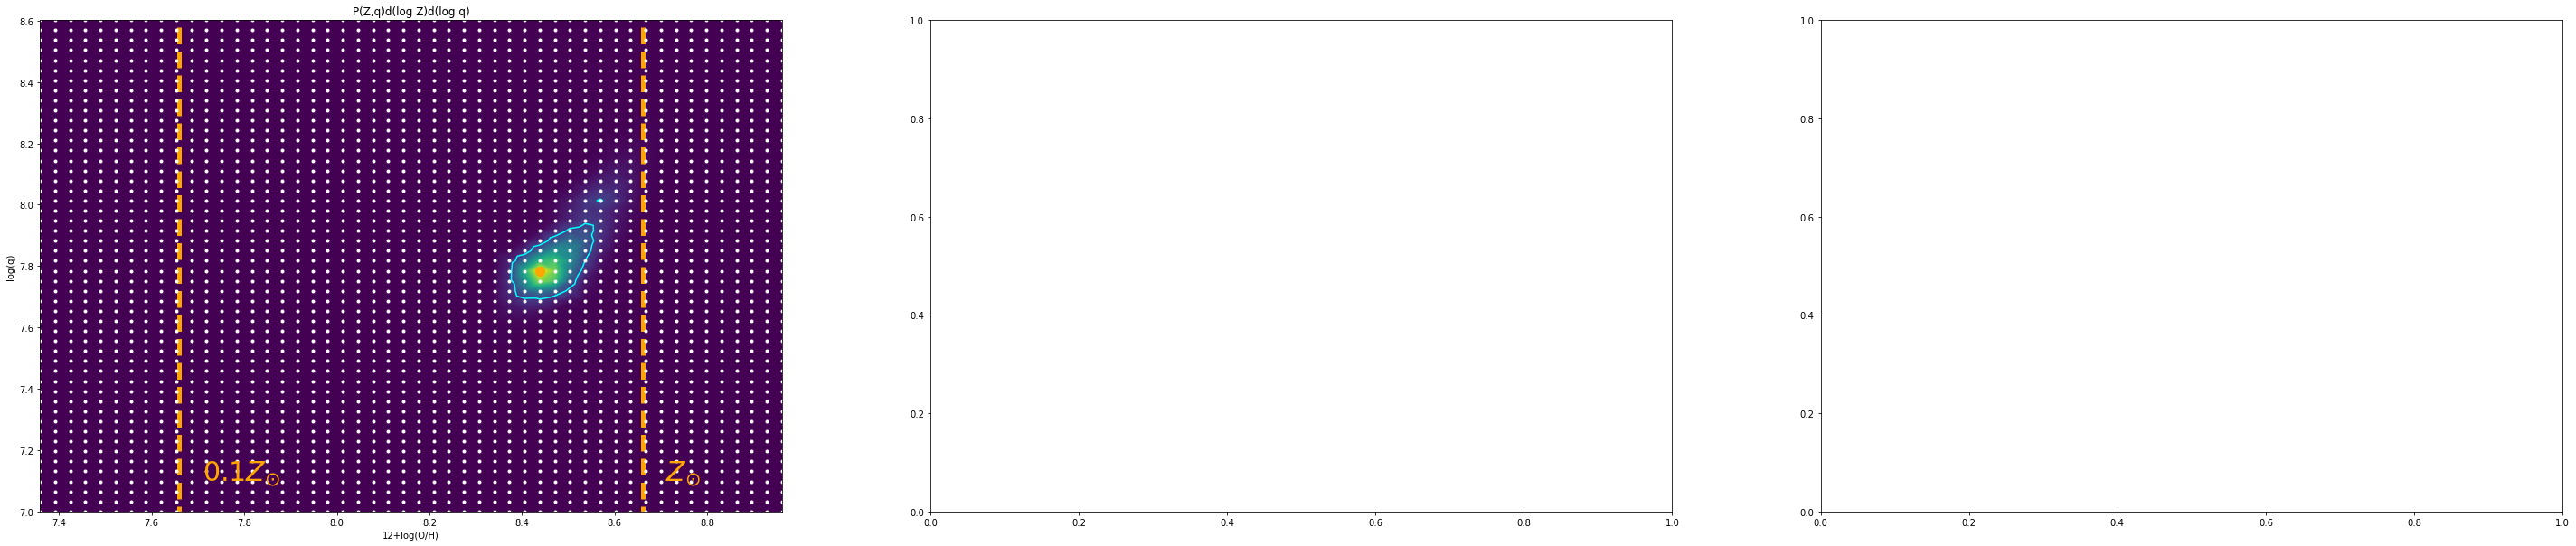

[[ 0.32755202]
 [ 0.3440769 ]
 [ 0.36060181]
 ..., 
 [ 0.38994309]
 [ 0.39232168]
 [ 0.39470023]] [[ 1.]
 [ 1.]
 [ 1.]
 ..., 
 [ 1.]
 [ 1.]
 [ 1.]]


/afs/cas.unc.edu/users/m/u/mugpol/.conda/envs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:68: RuntimeWarning: invalid value encountered in log10
/afs/cas.unc.edu/users/m/u/mugpol/.conda/envs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:124: RuntimeWarning: invalid value encountered in log10


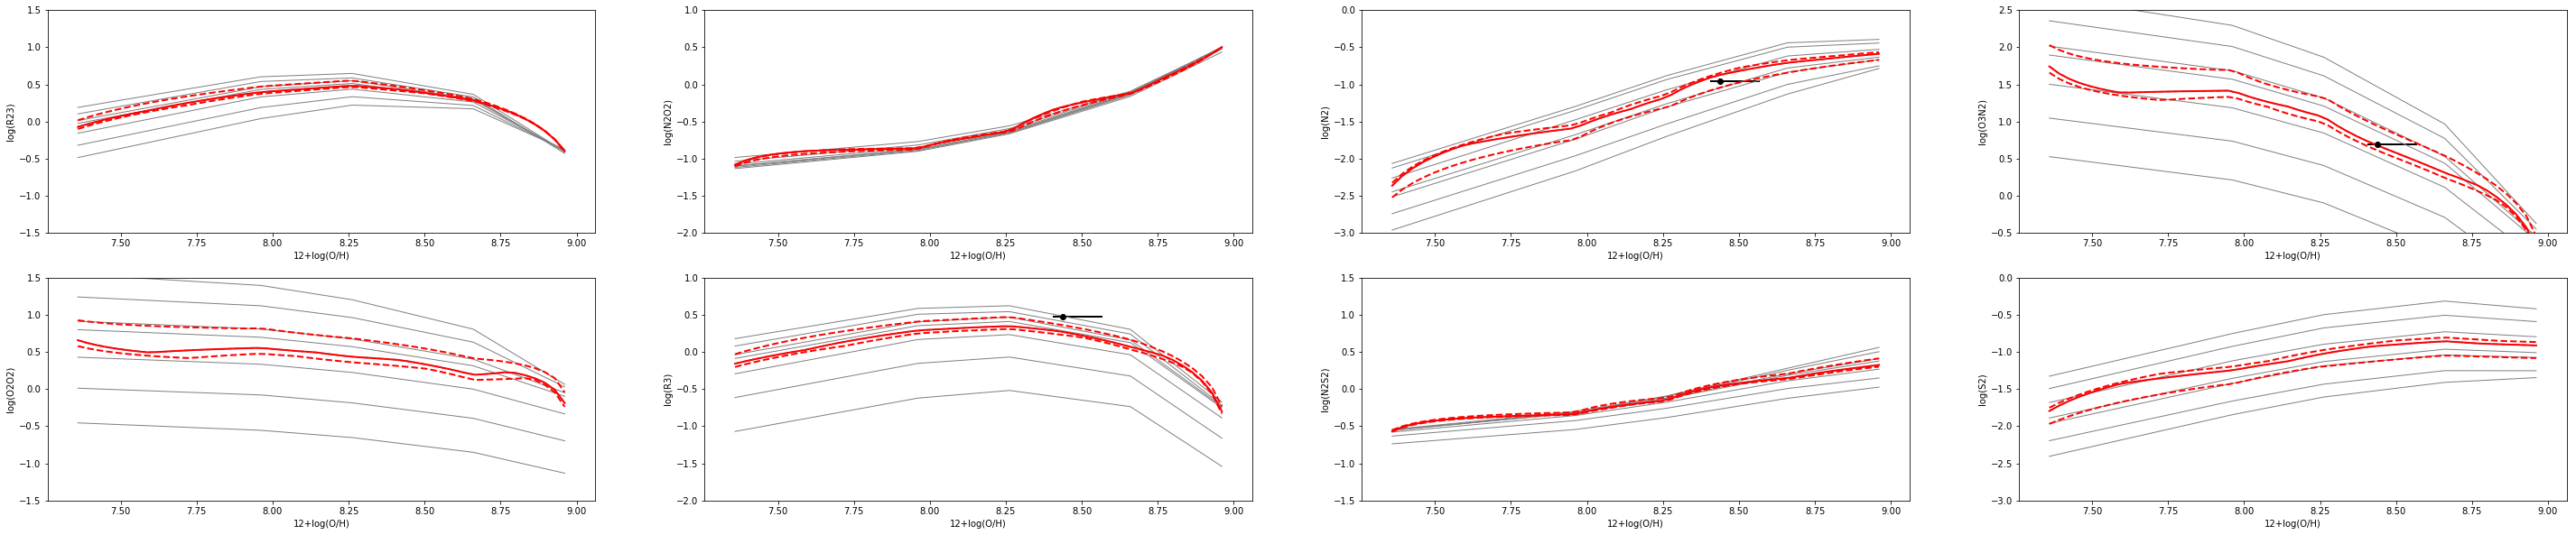

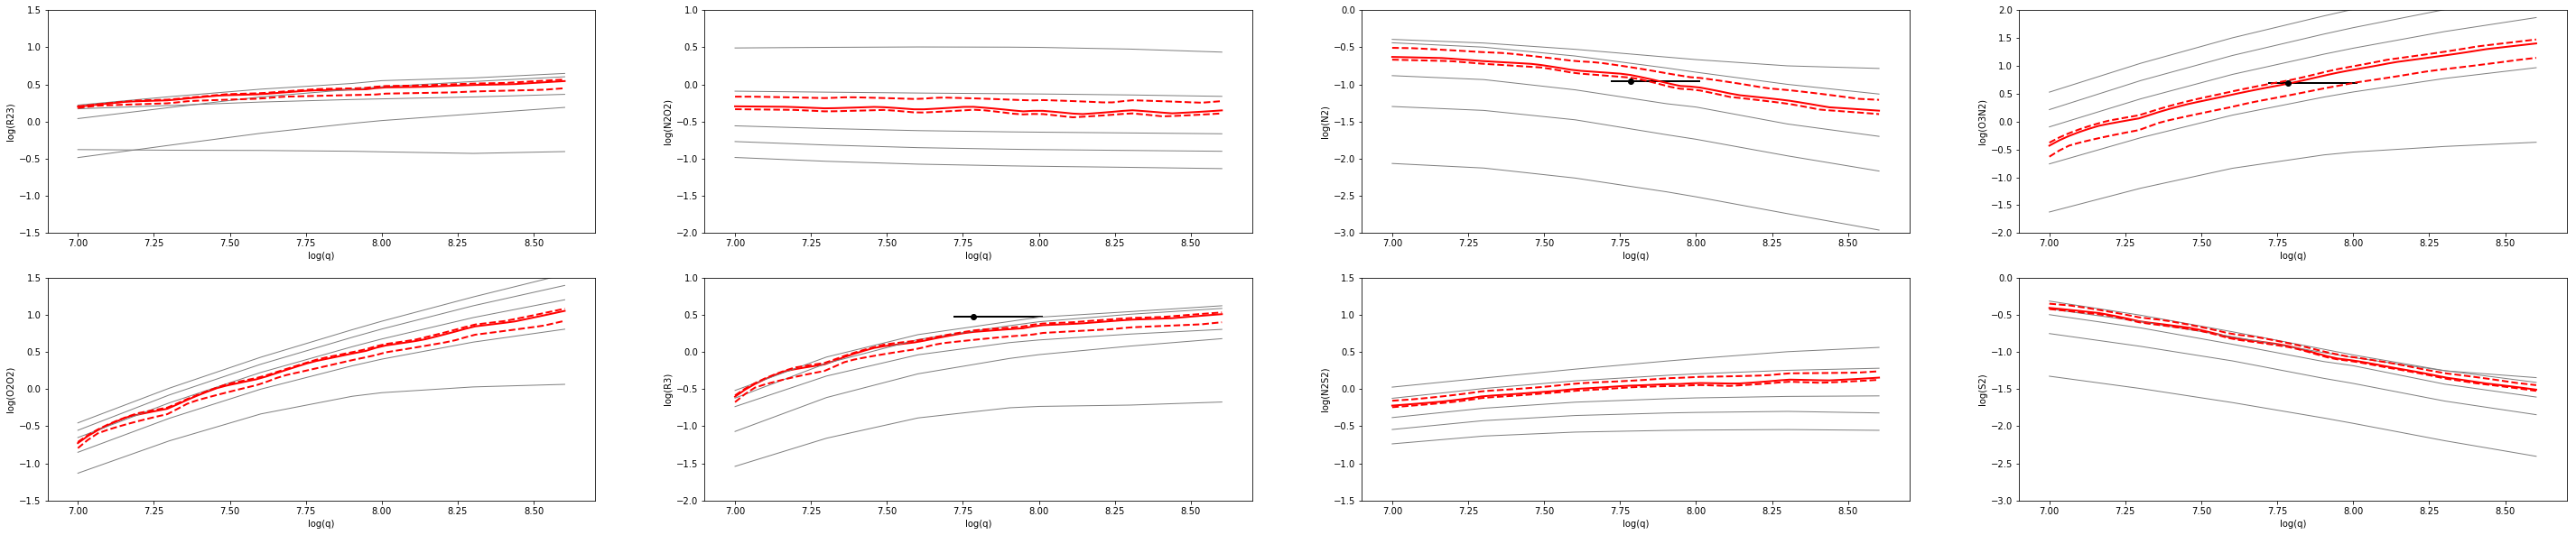

In [34]:
import numpy as np
import math
import matplotlib.pyplot as plt
#import PyQt5
#%matplotlib qt
import os
from astropy.table import Table
import pandas as pd
import scipy
import scipy.interpolate

def uprior(xaxis):
    return 1./(xaxis[1]-xaxis[0])

def idl_tabulate(x, f, p=5) :
    def newton_cotes(x, f) :
        #if x.shape[0] < 2 :
        #    return 0
        rn = (x.shape[0] - 1) * (x - x[0]) / (x[-1] - x[0])
        weights = scipy.integrate.newton_cotes(rn)[0]
        return (x[-1] - x[0]) / (x.shape[0] - 1) * np.dot(weights, f)
    ret = 0
    x = np.sort(x)
    f = np.sort(f)
    for idx in xrange(0, x.shape[0], p - 1) :
        ret += newton_cotes(x[idx:idx + p], f[idx:idx + p])
    return ret

def plotratioz( ga, gb, ga0, gb0, da, db, eda, edb, flaga, flagb, grid, grid0, logOHsun, d, ax, yrange=[-2.0, 2.0], title='log(ratio)'):
    #plot line ratio vs metallicity

        auxqarr = np.unique(grid['LOGQ'])
        auxqarr0 = np.unique(grid0['LOGQ'])

        sel1=np.where(abs(grid['LOGQ']-d.qgrid) == min(abs(grid['LOGQ']-d.qgrid))) 
        sel2=np.where(abs(grid['LOGQ']-d.qgrid-d.eupqgrid) == min(abs(grid['LOGQ']-d.qgrid-d.eupqgrid)))
        sel3=np.where(abs(grid['LOGQ']-d.qgrid+d.edownqgrid) == min(abs(grid['LOGQ']-d.qgrid+d.edownqgrid)))

        gridratio=ga/gb
        gridratio = gridratio.flatten()
        gridratio0=ga0/gb0
        gridratio0 = gridratio0.flatten()
        dratio=da/db
        edratio=np.sqrt((eda/db)**2 + (da/db**2*edb)**2)/dratio/np.log(10.)

        sel=np.where(abs(grid['LOGQ']-d.qgrid) == np.min(abs(grid['LOGQ']-d.qgrid)))[0] 
        ax.plot(grid['LOGZ'][sel]+logOHsun, np.log10(gridratio[sel]),'--')
        ax.set_ylim(yrange)
        ax.set_xlim(min(grid['LOGZ'])+logOHsun-0.1, max(grid['LOGZ'])+logOHsun+0.1)
        ax.set_xlabel('12+log(O/H)')
        ax.set_ylabel(title)
        ''' for i in range(n_elements(auxqarr)-1):
            sel=np.where(grid['LOGQ'] == auxqarr[i]) 
            plt.plot(grid[sel]['LOGZ']+logOHsun, np.log10(gridratio[sel]),'.', color='0.75',linewidth = 3)
        '''

        for i in range(len(auxqarr0)):
            sel=np.where(grid0['LOGQ'] == auxqarr0[i]) 
            ax.plot(grid0[sel]['LOGZ']+logOHsun, np.log10(gridratio0[sel]),color='gray',linewidth = 1)

        ax.plot(grid[sel1]['LOGZ']+logOHsun, np.log10(gridratio[sel1]), linewidth=2, color='red')
        ax.plot(grid[sel2]['LOGZ']+logOHsun, np.log10(gridratio[sel2]),'--', linewidth=2, color='red')
        ax.plot(grid[sel3]['LOGZ']+logOHsun, np.log10(gridratio[sel3]),'--', linewidth=2, color='red')

        if ((flaga == 1) and (flagb == 1)):
            dratio=da/db
            edratio1=np.sqrt((eda/db)**2+(da/db**2*edb)**2)/dratio/np.log10(10.)
            ax.errorbar([d.Zgrid], np.log10(dratio), yerr = edratio1, fmt = 'o', xerr = [[d.edownZgrid]*len([d.Zgrid]), [d.eupZgrid]*len([d.Zgrid])], linewidth=2, color='k')

        elif (flaga == 2 and flagb == 1):
            dratio=eda/db
            edratio=eda/(db-edb)-eda/db
            ax.errorbar([d.Zgrid], np.log10(dratio), yerr = edratio1, fmt = 'o', xerr = [[d.edownZgrid]*len([d.Zgrid]), [d.eupZgrid]*len([d.Zgrid])], linewidth=2, color='k')
            symbols = [u'\u2193']
            ax.plot( d.Zgrid, np.log10(dratio), symbols,size = 10, linewidth=2 , color='k')

        elif (flaga == 1 and flagb == 2):
            dratio=da/edb
            edratio=da/edb-(da-eda)/edb
            ax.errorbar([d.Zgrid], np.log10(dratio), yerr = edratio1, fmt = 'o', xerr = [[d.edownZgrid]*len([d.Zgrid]), [d.eupZgrid]*len([d.Zgrid])], linewidth=2, color='k')
            symbols = [u'\u2191']
            ax.plot( d.Zgrid, np.log10(dratio), symbols,size = 10, linewidth=4 , color='k')

def  plotratioq (ga, gb, ga0, gb0, da, db, eda, edb, flaga, flagb, grid, grid0, logOHsun, d, ax, yrange=[-2.0,2.0], title='log(ratio)'):
# plot a line ratio vs the ionization parameter
        auxzarr = np.unique(grid['LOGZ'])
        auxzarr0 = np.unique(grid0['LOGZ'])

        sel1=np.where(abs(grid['LOGZ']+logOHsun-d.Zgrid) == min(abs(grid['LOGZ']+logOHsun-d.Zgrid)))[0] 
        sel2=np.where(abs(grid['LOGZ']+logOHsun-d.Zgrid-d.eupZgrid) == min(abs(grid['LOGZ']+logOHsun-d.Zgrid-d.eupZgrid)))[0]
        sel3=np.where(abs(grid['LOGZ']+logOHsun-d.Zgrid+d.edownZgrid) == min(abs(grid['LOGZ']+logOHsun-d.Zgrid+d.edownZgrid)))[0]
        sel1=sel1[np.argsort(grid[sel1]['LOGQ'])]
        sel2=sel2[np.argsort(grid[sel2]['LOGQ'])]
        sel3=sel3[np.argsort(grid[sel3]['LOGQ'])]

        gridratio=ga/gb
        gridratio = gridratio.flatten()
        gridratio0=ga0/gb0
        gridratio0 = gridratio0.flatten()

        ax.plot(grid['LOGQ'][sel1], np.log10(gridratio[sel1]), color = 'red', linewidth = 2)
        ax.set_ylim(yrange)
        ax.set_xlim(min(grid['LOGQ'])-0.1, max(grid['LOGQ'])+0.1)
        ax.set_xlabel('log(q)')
        ax.set_ylabel(title)

        ''' for i in range (n_elements(auxzarr)-1):
        sel=np.where(grid.logz ==  auxzarr[i]) 
        sel=sel[np.sort(grid[sel].logq)]
        plt.plot(grid[sel].logq, math.log10(gridratio[sel]), '.', color='0.75', linewidth = 3)
        '''

        for i in range(len(auxzarr0)):
            sel=np.where(grid0['LOGZ'] == auxzarr0[i])[0]
            sel=sel[np.argsort(grid0[sel]['LOGQ'])]
            ax.plot(grid0[sel]['LOGQ'], np.log10(gridratio0[sel]), color='gray', linewidth = 1)

        ax.plot(grid[sel2]['LOGQ'], np.log10(gridratio[sel2]),'--', linewidth=2, color='red')
        ax.plot(grid[sel3]['LOGQ'], np.log10(gridratio[sel3]),'--', linewidth=2, color='red')

        if ((flaga == 1) and (flagb == 1)):
            dratio=da/db
            edratio1=np.sqrt((eda/db)**2+(da/db**2*edb)**2)/dratio/np.log10(10.)
            ax.errorbar([d.qgrid], np.log10(dratio), yerr = edratio1, fmt = 'o', xerr = [[d.edownqgrid]*len([d.qgrid]), [d.eupqgrid]*len([d.qgrid])], linewidth=2, color='k')

        elif (flaga == 2 and flagb == 1):
            dratio=eda/db
            edratio=eda/(db-edb)-eda/db
            ax.errorbar([d.qgrid], np.log10(dratio), yerr = edratio1, fmt = 'o', xerr = [[d.edownqgrid]*len([d.qgrid]), [d.eupqgrid]*len([d.qgrid])], linewidth=2, color='k')
            symbols = [u'\u2193']
            ax.plot( d.qgrid, np.log10(dratio), symbols,size = 10, linewidth=2 , color='k')

        elif (flaga == 1 and flagb == 2):
            dratio=da/edb
            edratio=da/edb-(da-eda)/edb
            ax.errorbar([d.qgrid], np.log10(dratio), yerr = edratio1, fmt = 'o', xerr = [[d.edownqgrid]*len([d.qgrid]), [d.eupqgrid]*len([d.qgrid])], linewidth=2, color='k')
            symbols = [u'\u2191']
            ax.plot( d.qgrid, np.log10(dratio), symbols,size = 10, linewidth=4 , color='k')


os.chdir('/afs/cas.unc.edu/users/m/u/mugpol/Documents/IZI/izi/')
inputfile = 'resolvecatalog_str.fits'

dat = Table.read(inputfile, format='fits')
infile = dat.to_pandas()

'''fluxin = np.array( [infile.F_OIII_5007_BROAD[0], infile.F_HB_BROAD[0]])
errorin = np.array( [infile.F_OIII_5007_ERR_BROAD[0], infile.F_HB_ERR_BROAD[0]])
idin = ['oiii5007', 'hbeta']
print fluxin, errorin
'''
fluxnames = ['F_OIII_5007_ERR_BROAD' ,
'F_OIII_5007_BROAD' ,
'F_OIII_4960_ERR_BROAD' ,
'F_OIII_4960_BROAD' ,
'F_OIII_4363_ERR_BROAD' ,
'F_OIII_4363_BROAD' ,
'F_NII_6586_ERR_BROAD' ,
'F_NII_6586_BROAD' ,
'F_NII_6548_ERR_BROAD' ,
'F_NII_6548_BROAD' ,
'F_HB_ERR_BROAD' ,
'F_HB_BROAD' ,
'F_HA_ERR_BROAD' ,
'F_HA_BROAD']
fluxin = []
errorin = []
i = 0
while (i<len(fluxnames)):
        fluxin.append(infile[fluxnames[i+1]][0])
        errorin.append(infile[fluxnames[i]][0])
        print fluxnames[i], fluxnames[i+1], i
        i = i+2
        

idin = ['oiii5007', 'oiii4959', 'oiii4363' , 'nii6584',  'nii6548', 'hbeta', 'halpha' ]


# RENAME INPUT ARRAYS
flux = fluxin
error = errorin
idno = idin

#CHECK INPUT FOR CONSISTENCY
nlines=len(flux)
if (len(error) != nlines | len(idno) != nlines): 
    print 'ERROR: Flux, Error, and ID arrays do not have the same number of elements'

#READ STRUCTURE CONTAINING PHOTO-IONIZATION MODEL GRID

#IF NOT SPECIFIED BY USER USE DEFAULT: 
#Levesque 2010, HIGH MASS LOSS, CSF 6Myr, n=100 cm^-3

try:
    gridfile
except NameError:
    os.chdir('/afs/cas.unc.edu/users/m/u/mugpol/Documents/IZI/izi/')
    gridfile = 'grids/l09_high_csf_n1e2_6.0Myr.fits'
    
#READ GRID
gridfile = 'grids/l09_high_csf_n1e2_6.0Myr.fits'
grid0 = Table.read(gridfile, format='fits')

grid0['ID'] = [np.char.strip(x) for x in grid0['ID']]
ngrid=len(grid0['LOGZ'])

#GET LINE IDs IN THE GRID AND INDEX OF EACH LINE
id0=grid0['ID'][0]
nlines0=len(id0)
for i in range (nlines0-1):
    'in'+id0[i]+"=where(id0 eq '"+id0[i]+"')"

#TAKE SOLAR OXYGEN ABUNDANCE FROM MODEL GRID IF NOT PROVIDED
try:
    logOHsun
except NameError:
    logOHsun = grid0['LOGOHSUN'][0]      

#CUT GRID TO LOGZLIMITS AND LOGQLIMITS 
try:
    logzlimits
except NameError:
    logzlimits = [min(grid0['LOGZ']+logOHsun), max(grid0['LOGZ']+logOHsun)]
try:
    logqlimits
except NameError:
    logqlimits = [min(grid0['LOGQ']), max(grid0['LOGQ'])]

grid0=grid0[np.where((grid0['LOGZ']+logOHsun >= logzlimits[0]) & (grid0['LOGZ']+logOHsun <= logzlimits[1]) & 
                     (grid0['LOGQ'] >= logqlimits[0]) & (grid0['LOGQ'] <= logqlimits[1]))]

#CHANGE LOGZPRIOR TO SOLAR UNITS
try:
    logqlimits
except NameError:
    logZprior[:,0]=logZprior-logOHsun

#INCLUDE SYSTEMATIC UNCERTAINTY IN THE PHOTO-IONIZATION MODELS
try:
    epsilon
except NameError:
    epsilon = 0.15 # default is 0.15 dex systematic uncertainty

epsilon2 = epsilon*math.log(10) # convert to scaling factor
#INTERPOLATE STRUCTURE
try:
    intergridfile 
    #MAKE NEW INTERPOLATED GRID WITH FINE SPACING
except NameError:
    flagnz = 0
    flagnq = 0
    
    try:
        nz
    except NameError:
        flagnz = 1
    if (not (flagnz)):
        nz1=nz
    else:
        nz1 = 50

    try:
        nq
    except NameError:
        flagnq = 1
    if not (flagnq):
        nq1=nq
    else:
        nq1 = 50

'''    zarr=np.linspace(min(grid0['LOGZ']), max(grid0['LOGZ']), nz1)
    qarr=np.linspace(min(grid0['LOGQ']), max(grid0['LOGQ']), nq1)

    dlogz=(zarr[nz1-1]-zarr[0])/(nz1-1)
    dlogq=(qarr[nq1-1]-qarr[0])/(nq1-1)

    fluxarr=np.zeros([nlines0, nz1, nq1])

    nz0=len(zarr)
    nq0=len(qarr)

    xaxis = np.linspace(zarr[0], zarr[nz1-1], nz1)
    yaxis = np.linspace(qarr[0], qarr[nq1-1], nq1)
    X, Y = np.meshgrid(xaxis,yaxis)

    z = np.array(np.unique(grid0['LOGZ']))
    q = np.array(np.unique(grid0['LOGQ']))
    try:
        LINEAR
    except NameError:
        for i in range(nlines0):
            fluxarr[i] = scipy.interpolate.interp2d(grid0['LOGZ'], grid0['LOGQ'], grid0['FLUX'][:,i], kind = 'linear')(zarr,qarr)
        #fluxarr[i,:,:] = scipy.interpolate.griddata((grid0['LOGZ'], grid0['LOGQ']), grid0['FLUX'][i], (X,Y), method = 'cubic')
    else: 
        for i in range(nlines0):
            fluxarr[i,:,:] = scipy.interpolate.griddata((grid0['LOGZ'], grid0['LOGQ']), grid0['FLUX'][i], (X,Y), method='linear')
    plt.figure()
    plt.plot(fluxarr[0])
    #CREATE AN EMPTY GRID 
    id_str = []
    for i in range(nz1*nq1):
        id_str.append(id0)
    id_str = np.array(id_str)

    names = []
    for i in range(nz1*nq1):
        names.append(grid0[0]['NAME'])    
    names = np.array(names)

    grid_flux = []
    for i in range(nz1*nq1):
        grid_flux.append(np.zeros(nlines0))    
    grid_flux = np.array(grid_flux)

    data = { 'NAME': names,
             'LOGZ': np.zeros(nz1*nq1),
             'LOGQ': np.zeros(nz1*nq1),
             'ID'  : id_str,
             'FLUX': grid_flux}

    grid = Table(data, names = ('NAME', 'LOGZ', 'LOGQ', 'ID', 'FLUX'))

    for i in range(nz1):
        for j in range(nq1):
            ngrid = i*nq1 + j
            grid[ngrid]['LOGZ'] = zarr[i]
            grid[ngrid]['LOGQ'] = qarr[j]
            for k in range(nlines0):
                grid[ngrid]['FLUX'][k] = fluxarr[k,i,j]
            #print 'yes'

    ngrid=ngrid+1
else:

        grid = grid0
        zarr = grid0[np.unique(grid0['LOGZ'])]['LOGZ']
        qarr = grid0[np.where(grid0['LOGZ'] == zarr[0])[0]]['LOGQ']
        nz1 = len(zarr)
        nq1 = len(qarr)
        dlogz = (zarr[nz1-1]-zarr[0])/(nz1-1)
        dlogq = (qarr[nq1-1]-qarr[0])/(nq1-1)
'''
intergridfile = 'outputgrid_linear.fits'
grid = Table.read(intergridfile, format='fits')
nz1 = 50
nq1 = 50
zarr = np.zeros(nz1)
qarr = np.zeros(nq1)
for i in range(nz1):
        for j in range(nq1):
            ngrid = i*nq1 + j
            zarr[i] = grid[ngrid]['LOGZ'] 
            qarr[j] = grid[ngrid]['LOGQ'] 
dlogz = (zarr[nz1-1]-zarr[0])/(nz1-1)
dlogq = (qarr[nq1-1]-qarr[0])/(nq1-1)
ngrid=2500

#CREATE DATA STRUCTURE CONTAINING LINE FLUXES AND ESTIMATED PARAMETERS
d = pd.Series({   'id'                  : id0,
                     'flux'             : np.zeros(nlines0) -666,
                     'error'            : np.zeros(nlines0) -666,
                     'chi2'             : 0., 
                     'Zgrid'            : 0., 
                     'eupZgrid'         : 0.,
                     'edownZgrid'       : 0.,
                     'qgrid'            : 0., 
                     'eupqgrid'         : 0.,
                     'edownqgrid'       : 0.,
                     'Zgridmarmod'      : 0.,
                     'eupZgridmarmod'   : 0.,
                     'edownZgridmarmod' : 0.,
                     'qgridmarmod'      : 0.,
                     'eupqgridmarmod'   : 0.,
                     'edownqgridmarmod' : 0.,
                     'Zgridmarmean'     : 0.,
                     'eupZgridmarmean'  : 0.,
                     'edownZgridmarmean': 0.,
                     'qgridmarmean'     : 0.,
                     'eupqgridmarmean'  : 0.,
                     'edownqgridmarmean': 0.,
                     'zarr'             : np.zeros(nz1),
                     'zpdfmar'          : np.zeros(nz1),
                     'qarr'             : np.zeros(nq1),
                     'qpdfmar'          : np.zeros(nq1),
                     'flag'            : [0,0,1,1], 
                     'pdfjoint'         : np.zeros([nz1,nq1]) 
                })

grid['ID'] = [np.char.strip(x) for x in grid['ID']]

#FILL STRUCTURE WITH LINE FLUXES
for i in range(nlines):
    auxind=np.where(d.id == idno[i])[0]
    print auxind, idno[i], d.id[auxind]
    if (auxind == 0):
        print 'ERROR: ===== Line ID '+idno[i]+'not recognized ====='
    d.flux[auxind]=flux[i]
    d.error[auxind]=error[i]

# INDEX OF LINES WITH MEASUREMENTS
good = np.where(d.error != -666)[0]
ngood = len(good)
measured = np.where(d.flux != -666)[0]
nmeasured = len(measured)
upperlim = np.where((d.error != -666) & (d.flux == -666))[0]
flag0=np.zeros(nlines0, dtype = float)
if (measured != []):
    flag0[measured] = 1      #measured flux
if (upperlim == []):
    flag0[upperlim] = 2      #upper limit on flux
flag=flag0[good]

# NORMALIZE LINE FLUXES TO H-BETA OR
# IF ABSENT NORMALIZE TO BRIGHTEST LINE
try:
    nonorm
except NameError: # use nonorm for line ratio fitting
    print 'Normalizing Fluxes'

    idnorm = 'hbeta'
    if (d.flux[np.where(d.id == idnorm)[0]] == -666):
        idnorm = (d.id[measured])[np.argsort(d.flux[measured])][::-1][0] 

    #normalize data
    norm = d.flux[np.where(d.id == idnorm)[0]]
    d.flux[measured] = d.flux[measured]/norm
    d.error[good] = d.error[good]/norm

    #normalize grid
    for i in range(ngrid):
        norm = grid[i]['FLUX'][np.where(grid[i]['ID'] == idnorm)]
        grid[i]['FLUX'] = grid[i]['FLUX']/norm[0]

#CALCULATE LIKELIHOOD AND POSTERIOR

like=np.ones(ngrid)
post=np.ones(ngrid)
zrange=[min(grid['LOGZ']), max(grid['LOGZ'])]
qrange=[min(grid['LOGQ']), max(grid['LOGQ'])]

for i in range(ngrid):
    for j in range(ngood):
                            #CALCULATE LIKELIHOOD
        if (flag[j] == 1): # If measured          
            normalization = np.sqrt(d.error[good][j]**2+(epsilon2*grid[i]['FLUX'][good][j])**2)
            flux_diff = (d.flux[good][j] - grid[i]['FLUX'][good][j])**2
            error_quad = (d.error[good][j]**2 + (epsilon2*grid[i]['FLUX'][good][j])**2)
            exponent = np.exp(-1.0*flux_diff/(2.0*error_quad))
            like[i] = like[i]*1.0/np.sqrt(2.0*3.14)*exponent/normalization

        if (flag[j] == 2): # if upper limit
            like[i] = like[i]*0.5*( 1 + scipy.special.erf((d.error[good][j] - grid[i]['FLUX'][good][j])/(np.sqrt(d.error[good][j]**2+(epsilon2*grid[i]['FLUX'][good][j])**2)*np.sqrt(2))))
                        #CALCULATE POSTERIOR BY INCLUDING PRIORS AND NORMALIZING
    if (('logzprior' in locals()) == 0) & (('logqprior' in locals()) == 0):
        post[i] = uprior(zrange)*uprior(qrange)*like[i]
        print post, 1
    if (('logzprior' in locals()) == 1) & (('logqprior' in locals()) == 0):
        post[i] = userprior(grid['LOGZ'][i], logzprior[:,0], logzprior[:,1])*uprior(qrange)*like[i]
        print post, 2
    if (('logzprior' in locals()) == 0) & (('logqprior' in locals()) == 1):
        post[i] = uprior(zrange)*userprior(grid[i].logq, logqprior[:,0], logqprior[:,1])*like[i]
        print post, 3
    if (('logzprior' in locals()) == 1) & (('logqprior' in locals()) == 1):
        post[i] = userprior(grid[i].logz, logzprior[:,0], logzprior[:,1])*userprior(grid['LOGQ'][i], logqprior[:,0], logqprior[:,1])*like[i]
        print post, 4

like[np.where(np.isfinite(like) == 0)]=0
post[np.where(np.isfinite(post) == 0)]=0

goodlike = np.where(np.isfinite(like))[0]
sortlike = like[goodlike][np.argsort(like[goodlike])[::-1]]
sortz = grid['LOGZ'][goodlike][np.argsort(like[goodlike])[::-1]]
sortq = grid['LOGQ'][goodlike][np.argsort(like[goodlike])[::-1]]
sumlike=np.zeros(len(sortlike))
for i in range (len(sortlike)):
    sumlike[i]=np.sum(sortlike[:i])/np.sum(sortlike)                                 

goodpost = np.where(np.isfinite(post))[0]  
sortpost = (post[goodpost])[np.argsort(post[goodpost])[::-1]]
sortz = np.array(grid['LOGZ'][goodpost][np.argsort(post[goodpost])[::-1]])
sortq = np.array(grid['LOGQ'][goodpost][np.argsort(post[goodpost])[::-1]])
sumpost = np.zeros(len(sortpost))
for i in range(len(sortpost)):
    sumpost[i] = np.sum(sortpost[0:i])/np.sum(sortpost) 

# CALCULATE BEST FIT METALLICITY, IONIZATION PARAMETER AND ERRORS

post1sig=(sortpost[np.where(sumpost >= 0.683)])[0]
post2sig=(sortpost[np.where(sumpost >= 0.955)])[0]
post3sig=(sortpost[np.where(sumpost >= 0.997)])[0]

like1sig=(sortlike[np.where(sumlike >= 0.683)])[0]
like2sig=(sortlike[np.where(sumlike >= 0.955)])[0]
like3sig=(sortlike[np.where(sumlike >= 0.997)])[0]

d.Zgrid = sortz[0]+logOHsun
d.edownZgrid = sortz[0]-min(sortz[np.where(sumpost <= 0.683)])
d.eupZgrid = max(sortz[np.where(sumpost <= 0.683)])-sortz[0]

d.qgrid = sortq[0]
d.edownqgrid = sortq[0]-min(sortq[np.where(sumpost <= 0.683)])
d.eupqgrid = max(sortq[np.where(sumpost <= 0.683)])-sortq[0]


# COMPUTE chi2

bestgrid = np.where((grid['LOGZ'] == sortz[0]) & (grid['LOGQ'] == sortq[0]))[0][0]
fobs = d.flux[np.where(d.flux != -666)[0]]  
eobs = d.error[np.where(d.flux != -666)[0]]  
fmod = grid['FLUX'][bestgrid][np.where(d.flux != -666)[0]]
emod = epsilon2*fmod
d.chi2 = np.sum((fobs-fmod)**2/(eobs**2+emod**2))/len(fobs)

# posterior for Z, marginalizing over q
postz = np.zeros(nz1, dtype = np.float64)
for j in range(nz1):
    postz[j] = idl_tabulate(sortq[np.where(sortz==zarr[j])[0]],sortpost[np.where(sortz==zarr[j])[0]])
postz = postz/np.sum(postz)

sumpostz = np.zeros(len(postz))
sumpz = 0
for i in range(nz1):
    sumpz += postz[i]
    sumpostz[i] += sumpz 

d.Zgridmarmod = zarr[np.where(postz == max(postz))[0]] + logOHsun # max of PDF
d.Zgridmarmean = np.sum(zarr*postz)/np.sum(postz) + logOHsun # first moment of PDF
d.edownZgridmarmod = d.Zgrid - logOHsun - zarr[np.where(sumpostz >= (1.0-0.683)/2.0)[0][0]]
d.eupZgridmarmod = zarr[np.where(sumpostz >= (1.0-(1.0-0.683)/2.0))[0][0]] - d.Zgrid + logOHsun
d.edownZgridmarmean = d.Zgrid - logOHsun - zarr[np.where(sumpostz >= (1.0-0.683)/2.0)[0][0]]

d.eupZgridmarmean = zarr[np.where(sumpostz >= (1.0-(1.0-0.683)/2.0))[0][0]] - d.Zgrid + logOHsun

#posterior for q, marginalizing over Z
postq = np.zeros(nq1)
for j in range(nq1):
    postq[j] = idl_tabulate(sortz[np.where(sortq == qarr[j])[0]], sortpost[np.where(sortq == qarr[j])[0]])
postq = postq/np.sum(postq)

sumpostq = np.zeros(len(postq))
sumpq = 0
for i in range(nq1):
    sumpq += postq[i]
    sumpostq[i] = sumpq 

d.qgridmarmod = qarr[np.where(postq == max(postq))[0]] #MAx of PDF
d.qgridmarmean = np.sum(qarr*postq)/np.sum(postq) # first moment of PDF
d.edownqgridmarmod = d.qgrid - qarr[np.where(sumpostq >= ((1.0-0.683)/2.0))[0][0]]
d.eupqgridmarmod = qarr[np.where(sumpostq >= (1.0-(1.0-0.683)/2.0))[0][0]] - d.qgrid
d.edownqgridmarmean = d.qgrid - qarr[np.where(sumpostq >= ((1.0-0.683)/2.0))[0][0]]
d.eupqgridmarmean = qarr[np.where(sumpostq >= (1.0-(1.0-0.683)/2.0))[0][0]] - d.qgrid

# WRITE MARGINALIZED PDFS
d.zarr=zarr+logOHsun
d.zpdfmar=postz
d.qarr=qarr
d.qpdfmar=postq

# Set FLAGS to warn bout multiple peaks and lower/upper limits
dzpdf=np.gradient(postz)
ddzpdf=np.gradient(dzpdf)
auxpeak = np.zeros(nz1, dtype=np.int)
for i in range (nz1-1):
    if ((dzpdf[i] > 0) & (dzpdf[i+1] < 0) & (ddzpdf[i] < 0)):
        auxpeak[i] = 1
zpeaks=np.where(auxpeak == 1)[0]
d.flag[0]=len(zpeaks)

dqpdf=np.gradient(postq)
ddqpdf=np.gradient(dqpdf)
auxpeak = np.zeros(nq1, dtype=np.int)
for i in range (nq1-1):
    if ((dqpdf[i] > 0) & (dqpdf[i+1] < 0) & (ddqpdf[i] < 0)):
        auxpeak[i] = 1
qpeaks=np.where(auxpeak == 1)[0]
d.flag[1]=len(qpeaks)

if (max(postz[0:1]) > 0.5*max(postz)): 
    d.flag[2]=2
if (max(postz[nz1-2:nz1-1]) > 0.5*max(postz)):
    d.flag[2]=3
if ((max(postz[0:1]) > 0.5*max(postz)) & (max(postz[nz1-2:nz1-1]) > 0.5*max(postz))):
    d.flag[2]=0
if (max(postq[0:1]) > 0.5*max(postq)): 
    d.flag[3]=2
if (max(postq[nq1-2:nq1-1]) > 0.5*max(postq)):
    d.flag[3]=3
if ((max(postq[0:1]) > 0.5*max(postq)) & (max(postq[nq1-2:nq1-1]) > 0.5*max(postq))): 
    d.flag[3]=0

print '===== BEST FIT FROM JOINT PDF MODE ====='
print '===== Z =====', d.Zgrid, d.edownZgrid, d.eupZgrid, d.Zgrid-d.edownZgrid, d.Zgrid+d.eupZgrid 
print '===== q =====', d.qgrid, d.edownqgrid, d.eupqgrid, d.qgrid-d.edownqgrid, d.qgrid+d.eupqgrid
c=2.99792458e10 # cm/s 
print '=== U=q/c ===', d.qgrid-np.log10(c), d.edownqgrid, d.eupqgrid, d.qgrid-np.log10(c)-d.edownqgrid, d.qgrid-np.log10(c)+d.eupqgrid
print '================ FLAGS ====================='
print d.flag
print '============================================'

# PLOT RESULTS
plot_flag = 0
try:
    plot
except NameError:
    plot_flag = 1
    
if (plot_flag == 1):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(50,10))
    col_range = [0,1]
    col_range[0] = 0*np.max(post[np.where(np.isfinite(np.log10(post)))[0]])
    col_range[1] = 1*np.max(post[np.where(np.isfinite(np.log10(post)))[0]])

    ncolors=256
    levels = col_range[0] + (col_range[1]-col_range[0])/(ncolors-1.0)*np.arange(ncolors)
    cmap = 'gist_earth'

    ax1.tricontourf(grid['LOGZ']+logOHsun, grid['LOGQ'], post,levels = levels)#, cmap = cmap)
    ax1.tricontour(grid[np.where(np.isfinite(np.log10(post)))[0]]['LOGZ']+logOHsun, grid[np.where(np.isfinite(np.log10(post)))[0]]['LOGQ'], post[np.where(np.isfinite(np.log10(post)))[0]], levels=[post1sig], colors = 'cyan')
    ax1.plot([logOHsun, logOHsun], [0,1e2], linestyle='--', linewidth=5, color='orange')
    ax1.plot([logOHsun-1.0, logOHsun-1.0], [0,1e2], linestyle='--', linewidth=5, color='orange')
    ax1.text(logOHsun+0.05, min(grid['LOGQ'])+0.1, r'$Z_{\odot}$', color = 'orange', size = 30)
    ax1.text(logOHsun-1+0.05, min(grid['LOGQ'])+0.1, r'$0.1Z_{\odot}$', color = 'orange', size = 30)
    ax1.plot(grid['LOGZ']+logOHsun, grid['LOGQ'], '.', color = 'white')
    ax1.plot(d.Zgrid, d.qgrid, marker = 'o', color='orange', markersize = 10)

    ax1.set_xlabel('12+log(O/H)')
    ax1.set_ylabel('log(q)')
    ax1.set_xlim([np.min(grid['LOGZ'])+logOHsun, np.max(grid['LOGZ'])+logOHsun])
    ax1.set_ylim([np.min(grid['LOGQ']), np.max(grid['LOGQ'])])
    ax1.set_title('P(Z,q)d(log Z)d(log q)')
    plt.show()

    plt.savefig('izipdf.png') 
    
    sel=np.where(np.isfinite(postz))
    ax2.plot(zarr[sel]+logOHsun, postz[sel], linewidth = '4',color = 'black')
    ax2.plot([d.Zgrid, d.Zgrid], [0,1.1*np.max(postz)], linestyle='-', linewidth=2, color='red')
    ax2.plot([d.Zgridmarmod, d.Zgridmarmod], [0,1.1*np.max(postz)], linestyle='-', linewidth=2, color='blue')
    ax2.plot([d.Zgridmarmean, d.Zgridmarmean], [0,1.1*np.max(postz)], linestyle='-', linewidth=2, color='green')
    ax2.plot([d.Zgrid-d.edownZgrid, d.Zgrid-d.edownZgrid], [0,1.1*np.max(postz)],linestyle=':', linewidth=1, color='red')
    ax2.plot([d.Zgrid+d.eupZgrid, d.Zgrid+d.eupZgrid], [0,1.1*np.max(postz)], linestyle=':', linewidth=1, color='red')
    ax2.plot([logOHsun, logOHsun], [0,1.1*np.max(postz)], linestyle='--', linewidth=2)
    ax2.plot([logOHsun-1, logOHsun-1], [0,1.1*np.max(postz)], linestyle='--', linewidth=2)

    ax2.set_xlabel('12+log(O/H)')
    ax2.set_ylabel('P(Z)d(log Z)')
    ax2.set_xlim([np.min(zarr)+logOHsun, np.max(zarr)+logOHsun])
    ax2.set_ylim([0, 1.1*np.max(postz)])

    sel=np.where(np.isfinite(postq))
    ax3.plot(qarr[sel], postq[sel],linewidth=4, color = 'black')
    ax3.plot([d.qgrid, d.qgrid], [0,1e2], linestyle='-', linewidth=4, color='red')
    ax3.plot([d.qgridmarmod, d.qgridmarmod], [0,1e2], linestyle='-', linewidth=2, color='blue')
    ax3.plot([d.qgridmarmean, d.qgridmarmean], [0,1e2], linestyle='-', linewidth=2, color='green')
    ax3.plot([d.qgrid-d.edownqgrid, d.qgrid-d.edownqgrid], [0,1e2], linestyle='--', linewidth=2, color='red')
    ax3.plot([d.qgrid+d.eupqgrid, d.qgrid+d.eupqgrid], [0,1e2], linestyle='--', linewidth=2, color='red')
    ax3.text(min(grid['LOGQ'])+1.1, 1.0*max(postq), 'Joint Mode', color='red', size=30)
    ax3.text(min(grid['LOGQ'])+1.1, 0.925*max(postq), 'Marg Mode', color='blue', size = 30)
    ax3.text(min(grid['LOGQ'])+1.1, 0.85*max(postq), 'Marg. Mean', color='green', size = 30)

    ax3.set_xlabel('log(q)')
    ax3.set_ylabel('P(q)d(log q)')
    ax3.set_xlim([np.min(qarr), np.max(qarr)])
    ax3.set_ylim([0, 1.1*max(postq)])

    plt.savefig('izipdf.png')
    
    #======== PLOTS VS METALLICITY ============

    fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(50,10))



    #======= R23 ========
    #define line ratio

    inoiii5007 = np.where('oiii5007' == grid['ID'][0])[0]
    inoii3726 = np.where('oii3726' == grid['ID'][0])[0]
    inhbeta = np.where('hbeta' == grid['ID'][0])[0]

    ga = np.array(grid['FLUX'])[:,inoiii5007] + np.array(grid['FLUX'])[:,inoii3726]
    gb = np.array(grid['FLUX'])[:,inhbeta]
    ga0 = np.array(grid0['FLUX'])[:,inoiii5007] + np.array(grid0['FLUX'])[:,inoii3726]
    gb0 = np.array(grid0['FLUX'])[:,inhbeta]
    da = d.flux[inoiii5007] + d.flux[inoii3726]
    db = d.flux[inhbeta]
    eda = np.sqrt(d.error[inoiii5007]**2 + d.error[inoii3726]**2)
    edb = d.error[inhbeta]     
    flaga = 1
    print ga,gb
    if (flag0[inoiii5007] == 2 or flag0[inoii3726] == 2):
        flaga=2
        da=-666
        eda=total(([d.flux[inoiii5007], d.flux[inoii3726]])[np.where([flag0[inoiii5007],flag0[inoii3726]] == 1)[0]]) + np.sum(([d.error[inoiii5007],d.error[inoii3726]])[np.where([flag0[inoiii5007],flag0[inoii3726]] == 2)[0]])

    if (flag0[inoiii5007] == 0 or flag0[inoii3726] == 0): 
        flagb = flag0[inhbeta]

    plotratioz(ga, gb, ga0, gb0, da, db, eda, edb, flaga, flagb,  grid, grid0, logOHsun, d, ax1, title='log(R23)', yrange=[-1.5,1.5])

    # ======= N2O2 ========
    # define line ratio

    innii6584 = np.where('nii6584' == grid['ID'][0])[0]
    ga=np.array(grid['FLUX'])[:,innii6584]
    gb=np.array(grid['FLUX'])[:,inoii3726]
    ga0=np.array(grid0['FLUX'])[:,innii6584]
    gb0=np.array(grid0['FLUX'])[:,inoii3726]
    da=d.flux[innii6584]
    db=d.flux[inoii3726]
    eda=d.error[innii6584]
    edb=d.error[inoii3726]
    flaga=flag0[innii6584]
    flagb=flag0[inoii3726]
    plotratioz(ga, gb, ga0, gb0, da, db, eda, edb, flaga, flagb,  grid, grid0, logOHsun, d, ax2, title='log(N2O2)', yrange=[-2,1])

    #======= N2 ========
    #define line ratio
    inhalpha = np.where('halpha' == grid['ID'][0])[0]

    ga=np.array(grid['FLUX'])[:,innii6584]
    gb=np.array(grid['FLUX'])[:,inhalpha]
    ga0=np.array(grid0['FLUX'])[:,innii6584]
    gb0=np.array(grid0['FLUX'])[:,inhalpha]
    da=d.flux[innii6584]
    db=d.flux[inhalpha]
    eda=d.error[innii6584]
    edb=d.error[inhalpha]
    flaga=flag0[innii6584]
    flagb=flag0[inhalpha]
    plotratioz(ga, gb, ga0, gb0, da, db, eda, edb, flaga, flagb,  grid, grid0, logOHsun, d, ax3, title='log(N2)', yrange=[-3.0,0.0])


    # ======= O3N2 ========
    # define line ratio
    ga=np.array(grid['FLUX'])[:,inoiii5007]
    gb=np.array(grid['FLUX'])[:,innii6584]
    ga0=np.array(grid0['FLUX'])[:,inoiii5007]
    gb0=np.array(grid0['FLUX'])[:,innii6584]
    da=d.flux[inoiii5007]
    db=d.flux[innii6584]
    eda=d.error[inoiii5007]
    edb=d.error[innii6584]
    flaga=flag0[inoiii5007]
    flagb=flag0[innii6584]
    plotratioz(ga, gb, ga0, gb0, da, db, eda, edb, flaga, flagb,  grid, grid0, logOHsun, d, ax4, title='log(O3N2)', yrange=[-0.5,2.5])

    # ======= O3O2 ========
    # define line ratio
    ga=np.array(grid['FLUX'])[:,inoiii5007]
    gb=np.array(grid['FLUX'])[:,inoii3726]
    ga0=np.array(grid0['FLUX'])[:,inoiii5007]
    gb0=np.array(grid0['FLUX'])[:,inoii3726]
    da=d.flux[inoiii5007]
    db=d.flux[inoii3726]
    eda=d.error[inoiii5007]
    edb=d.error[inoii3726]
    flaga=flag0[inoiii5007]
    flagb=flag0[inoii3726]
    plotratioz(ga, gb, ga0, gb0, da, db, eda, edb, flaga, flagb,  grid, grid0, logOHsun, d, ax5, title='log(O2O2)', yrange=[-1.5,1.5])

    # ======= R3 ========
    # define line ratio
    ga=np.array(grid['FLUX'])[:,inoiii5007]
    gb=np.array(grid['FLUX'])[:,inhbeta]
    ga0=np.array(grid0['FLUX'])[:,inoiii5007]
    gb0=np.array(grid0['FLUX'])[:,inhbeta]
    da=d.flux[inoiii5007]
    db=d.flux[inhbeta]
    eda=d.error[inoiii5007]
    edb=d.error[inhbeta]
    flaga=flag0[inoiii5007]
    flagb=flag0[inhbeta]
    plotratioz(ga, gb, ga0, gb0, da, db, eda, edb, flaga, flagb,  grid, grid0, logOHsun, d, ax6, title='log(R3)', yrange=[-2,1])

    #======= N2S2 ========
    # define line ratio
    insii6717 = np.where('sii6717' == grid['ID'][0])[0]
    insii6731 = np.where('sii6731' == grid['ID'][0])[0]

    ga=np.array(grid['FLUX'])[:,innii6584]
    gb=np.array(grid['FLUX'])[:,insii6717]+np.array(grid['FLUX'])[:,insii6731]
    ga0=np.array(grid0['FLUX'])[:,innii6584]
    gb0=np.array(grid0['FLUX'])[:,insii6717]+np.array(grid0['FLUX'])[:,insii6731]
    da=d.flux[innii6584]
    db=d.flux[insii6717]
    eda=d.error[innii6584]
    edb=d.error[insii6717]
    flaga=flag0[innii6584]
    flagb=flag0[insii6717]
    plotratioz(ga, gb, ga0, gb0, da, db, eda, edb, flaga, flagb,  grid, grid0, logOHsun, d, ax7, title='log(N2S2)', yrange=[-1.5,1.5])

    # ======= S2 ========
    # define line ratio
    ga=np.array(grid['FLUX'])[:,insii6717]+np.array(grid['FLUX'])[:,insii6731]
    gb=np.array(grid['FLUX'])[:,inhalpha]
    ga0=np.array(grid0['FLUX'])[:,insii6717]+np.array(grid0['FLUX'])[:,insii6731]
    gb0=np.array(grid0['FLUX'])[:,inhalpha]
    da=d.flux[insii6717]
    db=d.flux[inhalpha]
    eda=d.error[insii6717]
    edb=d.error[inhalpha]
    flaga=flag0[insii6717]
    flagb=flag0[inhalpha]
    plotratioz(ga, gb, ga0, gb0, da, db, eda, edb, flaga, flagb, grid, grid0, logOHsun, d, ax8, title='log(S2)', yrange=[-3.0,0.0])

    plt.savefig('izi_zratios.png')

    #============= PLOTS VERSUS IONIZATION PARAMETER ===========


    fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(50,10))

    #======= R23 ========
    #define line ratio

    inoiii5007 = np.where('oiii5007' == grid['ID'][0])[0]
    inoii3726 = np.where('oii3726' == grid['ID'][0])[0]
    inhbeta = np.where('hbeta' == grid['ID'][0])[0]

    ga = np.array(grid['FLUX'])[:,inoiii5007] + np.array(grid['FLUX'])[:,inoii3726]
    gb = np.array(grid['FLUX'])[:,inhbeta]
    ga0 = np.array(grid0['FLUX'])[:,inoiii5007] + np.array(grid0['FLUX'])[:,inoii3726]
    gb0 = np.array(grid0['FLUX'])[:,inhbeta]
    da = d.flux[inoiii5007] + d.flux[inoii3726]
    db = d.flux[inhbeta]
    eda = np.sqrt(d.error[inoiii5007]**2 + d.error[inoii3726]**2)
    edb = d.error[inhbeta]     
    flaga = 1
    if (flag0[inoiii5007] == 2 or flag0[inoii3726] == 2):
        flaga=2
        da=-666
        eda=total(([d.flux[inoiii5007], d.flux[inoii3726]])[np.where([flag0[inoiii5007],flag0[inoii3726]] == 1)[0]]) + np.sum(([d.error[inoiii5007],d.error[inoii3726]])[np.where([flag0[inoiii5007],flag0[inoii3726]] == 2)[0]])

    if (flag0[inoiii5007] == 0 or flag0[inoii3726] == 0): 
        flagb = flag0[inhbeta]

    plotratioq(ga, gb, ga0, gb0, da, db, eda, edb, flaga, flagb,  grid, grid0, logOHsun, d, ax1, title='log(R23)', yrange=[-1.5,1.5])

    # ======= N2O2 ========
    # define line ratio

    innii6584 = np.where('nii6584' == grid['ID'][0])[0]
    ga=np.array(grid['FLUX'])[:,innii6584]
    gb=np.array(grid['FLUX'])[:,inoii3726]
    ga0=np.array(grid0['FLUX'])[:,innii6584]
    gb0=np.array(grid0['FLUX'])[:,inoii3726]
    da=d.flux[innii6584]
    db=d.flux[inoii3726]
    eda=d.error[innii6584]
    edb=d.error[inoii3726]
    flaga=flag0[innii6584]
    flagb=flag0[inoii3726]
    plotratioq(ga, gb, ga0, gb0, da, db, eda, edb, flaga, flagb,  grid, grid0, logOHsun, d, ax2, title='log(N2O2)', yrange=[-2,1])

    #======= N2 ========
    #define line ratio
    inhalpha = np.where('halpha' == grid['ID'][0])[0]

    ga=np.array(grid['FLUX'])[:,innii6584]
    gb=np.array(grid['FLUX'])[:,inhalpha]
    ga0=np.array(grid0['FLUX'])[:,innii6584]
    gb0=np.array(grid0['FLUX'])[:,inhalpha]
    da=d.flux[innii6584]
    db=d.flux[inhalpha]
    eda=d.error[innii6584]
    edb=d.error[inhalpha]
    flaga=flag0[innii6584]
    flagb=flag0[inhalpha]
    plotratioq(ga, gb, ga0, gb0, da, db, eda, edb, flaga, flagb,  grid, grid0, logOHsun, d, ax3, title='log(N2)', yrange=[-3.0,0.0])


    # ======= O3N2 ========
    # define line ratio
    ga=np.array(grid['FLUX'])[:,inoiii5007]
    gb=np.array(grid['FLUX'])[:,innii6584]
    ga0=np.array(grid0['FLUX'])[:,inoiii5007]
    gb0=np.array(grid0['FLUX'])[:,innii6584]
    da=d.flux[inoiii5007]
    db=d.flux[innii6584]
    eda=d.error[inoiii5007]
    edb=d.error[innii6584]
    flaga=flag0[inoiii5007]
    flagb=flag0[innii6584]
    plotratioq(ga, gb, ga0, gb0, da, db, eda, edb, flaga, flagb,  grid, grid0, logOHsun, d, ax4, title='log(O3N2)', yrange=[-2.0,2.0])

    # ======= O3O2 ========
    # define line ratio
    ga=np.array(grid['FLUX'])[:,inoiii5007]
    gb=np.array(grid['FLUX'])[:,inoii3726]
    ga0=np.array(grid0['FLUX'])[:,inoiii5007]
    gb0=np.array(grid0['FLUX'])[:,inoii3726]
    da=d.flux[inoiii5007]
    db=d.flux[inoii3726]
    eda=d.error[inoiii5007]
    edb=d.error[inoii3726]
    flaga=flag0[inoiii5007]
    flagb=flag0[inoii3726]
    plotratioq(ga, gb, ga0, gb0, da, db, eda, edb, flaga, flagb,  grid, grid0, logOHsun, d, ax5, title='log(O2O2)', yrange=[-1.5,1.5])

    # ======= R3 ========
    # define line ratio
    ga=np.array(grid['FLUX'])[:,inoiii5007]
    gb=np.array(grid['FLUX'])[:,inhbeta]
    ga0=np.array(grid0['FLUX'])[:,inoiii5007]
    gb0=np.array(grid0['FLUX'])[:,inhbeta]
    da=d.flux[inoiii5007]
    db=d.flux[inhbeta]
    eda=d.error[inoiii5007]
    edb=d.error[inhbeta]
    flaga=flag0[inoiii5007]
    flagb=flag0[inhbeta]
    plotratioq(ga, gb, ga0, gb0, da, db, eda, edb, flaga, flagb,  grid, grid0, logOHsun, d, ax6, title='log(R3)', yrange=[-2,1])

    #======= N2S2 ========
    # define line ratio
    insii6717 = np.where('sii6717' == grid['ID'][0])[0]
    insii6731 = np.where('sii6731' == grid['ID'][0])[0]

    ga=np.array(grid['FLUX'])[:,innii6584]
    gb=np.array(grid['FLUX'])[:,insii6717]+np.array(grid['FLUX'])[:,insii6731]
    ga0=np.array(grid0['FLUX'])[:,innii6584]
    gb0=np.array(grid0['FLUX'])[:,insii6717]+np.array(grid0['FLUX'])[:,insii6731]
    da=d.flux[innii6584]
    db=d.flux[insii6717]
    eda=d.error[innii6584]
    edb=d.error[insii6717]
    flaga=flag0[innii6584]
    flagb=flag0[insii6717]
    plotratioq(ga, gb, ga0, gb0, da, db, eda, edb, flaga, flagb,  grid, grid0, logOHsun, d, ax7, title='log(N2S2)', yrange=[-1.5,1.5])

    # ======= S2 ========
    # define line ratio
    ga=np.array(grid['FLUX'])[:,insii6717]+np.array(grid['FLUX'])[:,insii6731]
    gb=np.array(grid['FLUX'])[:,inhalpha]
    ga0=np.array(grid0['FLUX'])[:,insii6717]+np.array(grid0['FLUX'])[:,insii6731]
    gb0=np.array(grid0['FLUX'])[:,inhalpha]
    da=d.flux[insii6717]
    db=d.flux[inhalpha]
    eda=d.error[insii6717]
    edb=d.error[inhalpha]
    flaga=flag0[insii6717]
    flagb=flag0[inhalpha]
    plotratioq(ga, gb, ga0, gb0, da, db, eda, edb, flaga, flagb, grid, grid0, logOHsun, d, ax8, title='log(S2)', yrange=[-3.0,0.0])

    plt.savefig('izi_qratios.png')


In [40]:
print type(d.id[0]), type(idno[0]), type(id0[0])

<type 'numpy.string_'> <type 'str'> <type 'numpy.string_'>


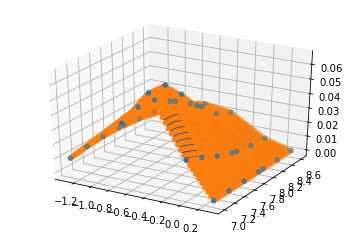

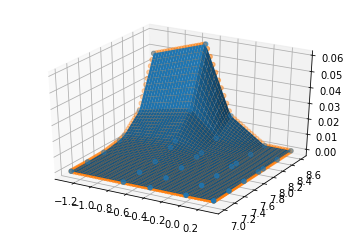

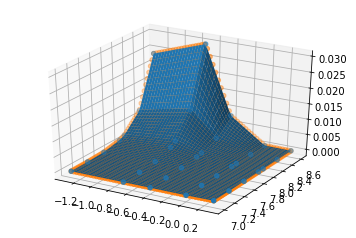

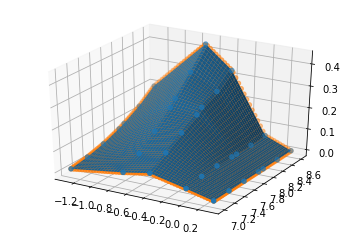

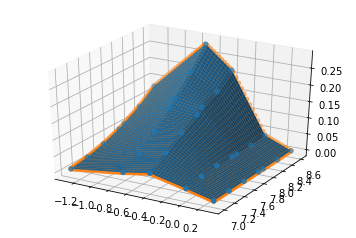

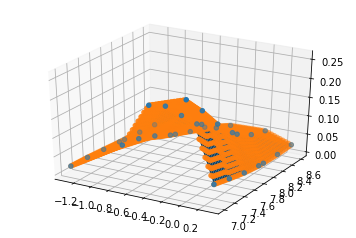

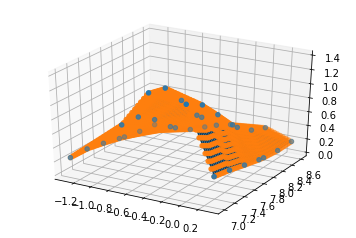

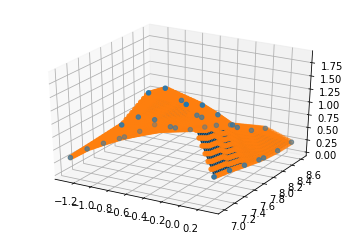

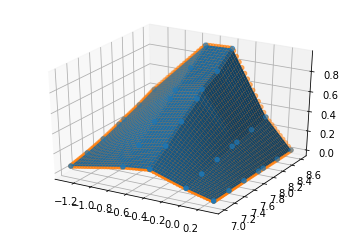

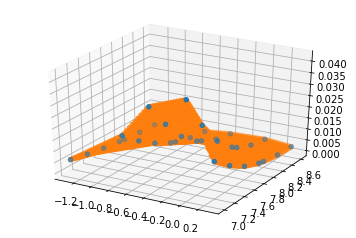

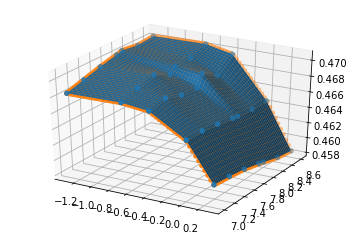

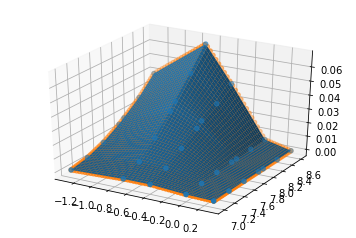

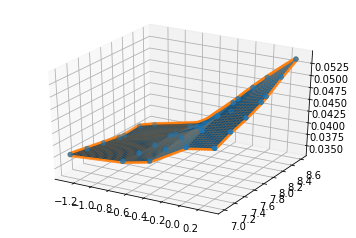

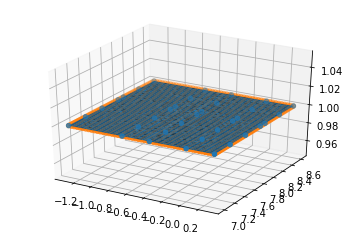

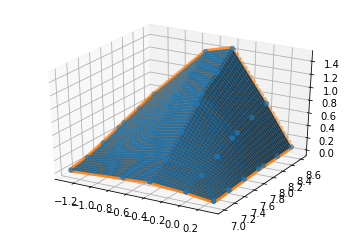

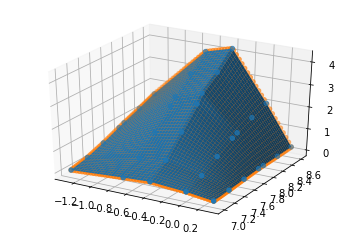

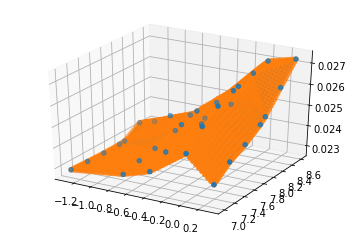

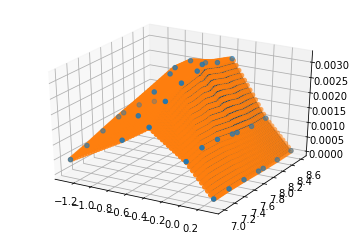

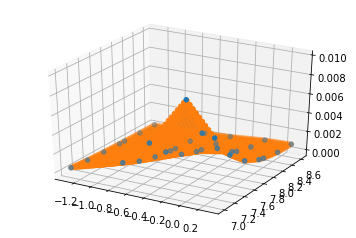

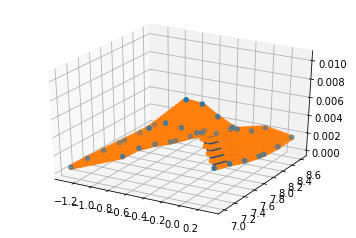

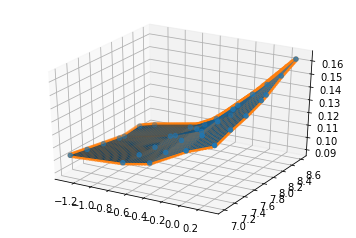

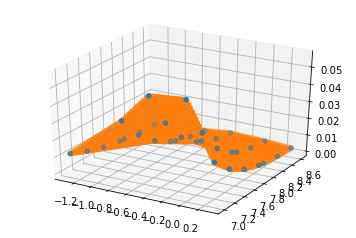

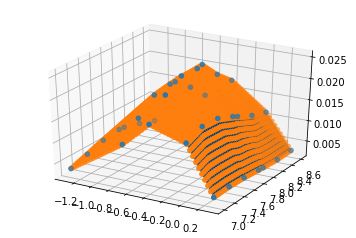

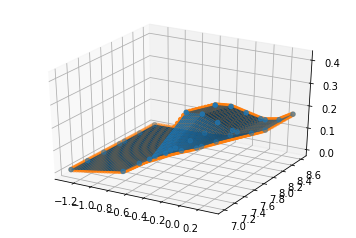

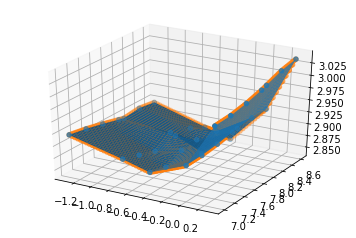

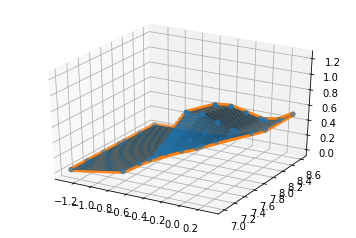

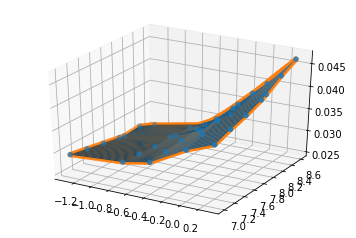

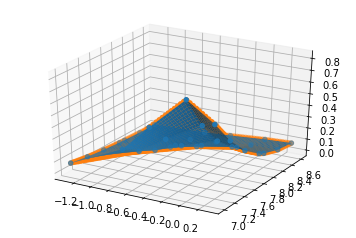

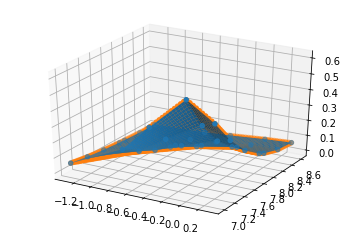

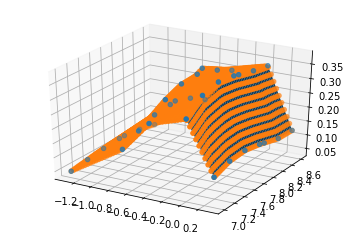

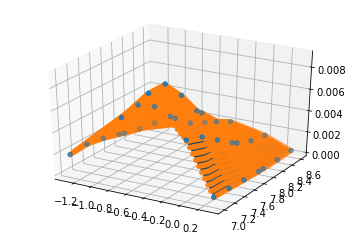

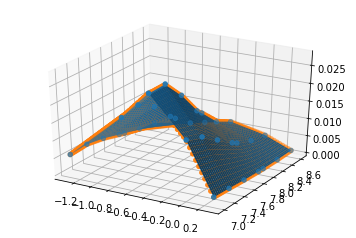

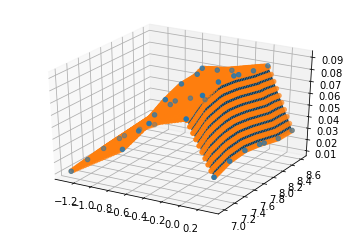

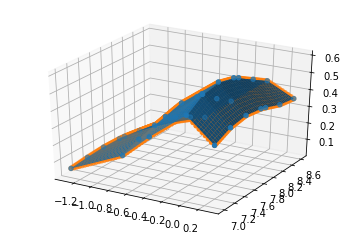

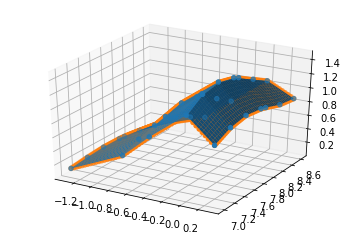

In [28]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
Z = np.array(grid0['LOGZ'])
q = np.array(grid0['LOGQ'])

x = np.unique(Z)
y = np.unique(q)
X, Y = np.meshgrid(x,y)
nlines0 = 35
z = np.zeros([len(y), len(x),nlines0])

Z1 = np.array(grid['LOGZ'])
q1 = np.array(grid['LOGQ'])

x1 = np.unique(Z1)
y1 = np.unique(q1)
X1, Y1 = np.meshgrid(x1,y1)
nlines0 = 35
z1 = np.zeros([len(y1), len(x1),nlines0])

fluxarr = np.zeros([nlines0,nz1,nq1])
zarr=np.linspace(min(grid0['LOGZ']), max(grid0['LOGZ']), nz1)
qarr=np.linspace(min(grid0['LOGQ']), max(grid0['LOGQ']), nq1)
gridx, gridy = np.meshgrid(zarr, qarr)

for k in range (nlines0):
    for i in range(len(x)):
        for j in range(len(y)):
            n = np.where((q == y[j]) & (Z == x[i]))[0]
            z[j,i,k] = grid0['FLUX'][n,k]
    
    
    for i in range(len(x1)):
        for j in range(len(y1)):
            n1 = np.where((q1 == y1[j]) & (Z1 == x1[i]))[0]
            z1[j,i,k] = grid['FLUX'][n1,k]
    f = scipy.interpolate.interp2d(x,y,z[:,:,k],'linear')
    fluxarr[k,:,:] = f(zarr,qarr)

    #if (plot):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(gridx, gridy, fluxarr[k])
    ax.scatter(X,Y,z[:,:,k],'r')
    ax.scatter(X1,Y1,z1[:,:,k],'r')
    
    #ax.scatter(X,Y,grid['FLUX'][:,0],'r')

In [26]:
print grid['FLUX'][:,0].shape, z[:,:,k].shape

(2500,) (7, 5)


In [2]:
print d

Zgrid                                                          8.37252
Zgridmarmean                                                   8.36007
Zgridmarmod                                            [8.37251804617]
chi2                                                           3.09212
edownZgrid                                                     0.13078
edownZgridmarmean                                            0.0980853
edownZgridmarmod                                             0.0980853
edownqgrid                                                   0.0326951
edownqgridmarmean                                            0.0326951
edownqgridmarmod                                             0.0326951
error                [-666.0, -666.0, -666.0, -666.0, -666.0, -666....
eupZgrid                                                     0.0653902
eupZgridmarmean                                              0.0653902
eupZgridmarmod                                               0.0653902
eupqgr

In [35]:
'''
names = grid['ID'][0]
lines = ['oiii5007', 'oii3726', ]
inhbeta = np.where('hbeta' == names)[0]
inhalpha = np.where('halpha' == names)[0]

for i in range(len(names)):
    ind = 
'''


['cii1335' 'civ1548' 'civ1551' 'ciii1909' 'ciii1911' 'cii2324' 'oii3726'
 'oii3729' 'neiii3869' 'sii4069' 'hgamma' 'oiii4363' 'hei4471' 'hbeta'
 'oiii4959' 'oiii5007' 'hei5016' 'ariii5192' 'ni5198' 'nii5755' 'hei5875'
 'oi6300' 'siii6312' 'nii6548' 'halpha' 'nii6584' 'hei6678' 'sii6717'
 'sii6731' 'ariii7136' 'oii7318' 'oii7320' 'ariii7751' 'siii9068'
 'siii9532']


In [3]:
print dat.info()

<Table length=2286>
         name           dtype  n_bad
---------------------- ------- -----
                  ZMAG float32     0
             ZKCORROLD float32     0
                ZKCORR float32     0
                   Z90 float32     0
                   Z50 float32     0
               UYKCORR float32     0
                  UY90 float32     0
                  UY50 float32     0
             UVOTM2_90 float32     0
             UVOTM2_50 float32     0
             UVOTM2MAG float32     0
                  UMAG float32     0
               UKKCORR float32     0
            UKIDSSYMAG float32     0
           UKIDSSYFLAG    str4     0
            UKIDSSKMAG float32     0
           UKIDSSKFLAG    str4     0
            UKIDSSHMAG float32     0
           UKIDSSHFLAG    str4     0
             UKCORROLD float32     0
                UKCORR float32     0
                  UK90 float32     0
                  UK50 float32     0
               UHKCORR float32     0
                  

/usr/local/continuum/anaconda2/lib/python2.7/site-packages/astropy/table/column.py:263: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self.data.__eq__(other)
/usr/local/continuum/anaconda2/lib/python2.7/site-packages/astropy/table/info.py:93: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if np.all(info[name] == ''):


In [28]:
zarr=np.linspace(min(grid0['LOGZ']), max(grid0['LOGZ']), nz1)
qarr=np.linspace(min(grid0['LOGQ']), max(grid0['LOGQ']), nq1)

xaxis = np.linspace(zarr[0], zarr[nz1-1], nz1)
yaxis = np.linspace(qarr[0], qarr[nq1-1], nq1)
X, Y = np.meshgrid(xaxis,yaxis)
#X, Y = np.meshgrid(zarr, qarr)
fluxarr=np.zeros([nlines0, nz1, nq1])
from scipy.interpolate import griddata
for i in range(nlines0):
    fluxarr[i,:,:] = griddata((grid0['LOGZ'], grid0['LOGQ']), grid0['FLUX'][i], (X,Y), method='linear')

print fluxarr[0,:,0]
plt.contourf(zarr,qarr,fluxarr[0,:,:],np.arange(0,1.01,0.01))

[  9.65460017e-03   8.60672834e-03   7.55885652e-03   6.51098469e-03
   5.46311286e-03   4.41524103e-03   3.36736920e-03   2.31949737e-03
   1.27162554e-03   2.23753714e-04   7.12341805e-04   1.60246877e-03
   2.49259573e-03   3.38272269e-03   4.27284965e-03   5.16297661e-03
   6.05310357e-03   6.94323053e-03   7.83335749e-03   2.31048657e-02
   4.85521241e-02   7.39993825e-02   9.94466409e-02   1.24893899e-01
   1.50341158e-01   1.75788416e-01   2.01235674e-01   2.26682933e-01
   2.11540360e-01   1.29731109e-01   4.79218586e-02   5.74320869e-04
   1.92857305e-03   3.28282524e-03   4.63707742e-03   5.99132960e-03
   7.34558179e-03   8.69983397e-03   1.00540862e-02   1.14083383e-02
   1.26789938e-02   1.36297723e-02   1.45805509e-02   1.55313294e-02
   1.64821079e-02   1.74328865e-02   1.83836650e-02   1.93344435e-02
   2.02852221e-02   2.12360006e-02]


In [89]:
nz1 = 50
nq1 = 50

zarr=np.linspace(min(grid0['LOGZ']), max(grid0['LOGZ']), nz1)
qarr=np.linspace(min(grid0['LOGQ']), max(grid0['LOGQ']), nq1)

dlogz=(zarr[nz1-1]-zarr[0])/(nz1-1)
dlogq=(qarr[nq1-1]-qarr[0])/(nq1-1)

fluxarr=np.zeros([nlines0, nz1, nq1])

nz0=len(zarr)
nq0=len(qarr)

X, Y = np.meshgrid(zarr,qarr)

for i in range(nlines0):
    fluxarr[i,:,:] = scipy.interpolate.griddata((grid0['LOGZ'], grid0['LOGQ']), grid0['FLUX'][i], (X,Y))
#else: 
#    for i in range(nlines0):
#        fluxarr[i,:,:] = scipy.interpolate.griddata((grid0['LOGZ'], grid0['LOGQ']), grid0['FLUX'][i], (X,Y), method='linear')


#CREATE AN EMPTY GRID 
id_str = []
for i in range(nz1*nq1):
    id_str.append(id0)
id_str = np.array(id_str)

names = []
for i in range(nz1*nq1):
    names.append(grid0[0]['NAME'])    
names = np.array(names)

grid_flux = []
for i in range(nz1*nq1):
    grid_flux.append(np.zeros(nlines0))    
grid_flux = np.array(grid_flux)

data = { 'NAME': names,
         'LOGZ': np.zeros(nz1*nq1),
         'LOGQ': np.zeros(nz1*nq1),
         'ID'  : id_str,
         'FLUX': flux}

grid1 = Table(data, names = ('NAME', 'LOGZ', 'LOGQ', 'ID', 'FLUX'))

for i in range(nz1):
    for j in range(nq1):
        ngrid = i*nq1 + j
        grid1[ngrid]['LOGZ'] = zarr[i]
        grid1[ngrid]['LOGQ'] = qarr[j]
        for k in range(nlines0):
            grid1[ngrid]['FLUX'][k] = fluxarr[k,i,j]
        #print 'yes'
ngrid=ngrid+1


In [90]:
#CREATE DATA STRUCTURE CONTAINING LINE FLUXES AND ESTIMATED PARAMETERS
d = pd.Series({   'id'                  : id0,
                     'flux'             : np.zeros(nlines0) -666,
                     'error'            : np.zeros(nlines0) -666,
                     'chi2'             : 0., 
                     'Zgrid'            : 0., 
                     'eupZgrid'         : 0.,
                     'edownZgrid'       : 0.,
                     'qgrid'            : 0., 
                     'eupqgrid'         : 0.,
                     'edownqgrid'       : 0.,
                     'Zgridmarmod'      : 0.,
                     'eupZgridmarmod'   : 0.,
                     'edownZgridmarmod' : 0.,
                     'qgridmarmod'      : 0.,
                     'eupqgridmarmod'   : 0.,
                     'edownqgridmarmod' : 0.,
                     'Zgridmarmean'     : 0.,
                     'eupZgridmarmean'  : 0.,
                     'edownZgridmarmean': 0.,
                     'qgridmarmean'     : 0.,
                     'eupqgridmarmean'  : 0.,
                     'edownqgridmarmean': 0.,
                     'zarr'             : np.zeros(nz1),
                     'zpdfmar'          : np.zeros(nz1),
                     'qarr'             : np.zeros(nq1),
                     'qpdfmar'          : np.zeros(nq1),
                     'flag'            : [0,0,1,1], 
                     'pdfjoint'         : np.zeros([nz1,nq1]) 
                })

grid['ID'] = [np.char.strip(x) for x in grid['ID']]

#FILL STRUCTURE WITH LINE FLUXES
for i in range(nlines):
    auxind=np.where(d.id == idno[i])[0]
    if (auxind == 0):
        print 'ERROR: ===== Line ID '+idno[i]+'not recognized ====='
    d.flux[auxind]=flux[i]
    d.error[auxind]=error[i]

# INDEX OF LINES WITH MEASUREMENTS
good = np.where(d.error != -666)[0]
ngood = len(good)
measured = np.where(d.flux != -666)[0]
nmeasured = len(measured)
upperlim = np.where((d.error != -666) & (d.flux == -666))[0]
flag0=np.zeros(nlines0, dtype = float)
if (measured != []):
    flag0[measured] = 1      #measured flux
if (upperlim == []):
    flag0[upperlim] = 2      #upper limit on flux
flag=flag0[good]

# NORMALIZE LINE FLUXES TO H-BETA OR
# IF ABSENT NORMALIZE TO BRIGHTEST LINE
try:
    nonorm
except NameError: # use nonorm for line ratio fitting
    print 'Normalizing Fluxes'

    idnorm = 'hbeta'
    if (d.flux[np.where(d.id == idnorm)[0]] == -666):
        idnorm = (d.id[measured])[np.argsort(d.flux[measured])][::-1][0] 

    #normalize data
    norm = d.flux[np.where(d.id == idnorm)[0]]
    d.flux[measured] = d.flux[measured]/norm
    d.error[good] = d.error[good]/norm

    #normalize grid
    for i in range(ngrid):
        norm = grid[i]['FLUX'][np.where(grid[i]['ID'] == idnorm)]
        grid[i]['FLUX'] = grid[i]['FLUX']/norm[0]

#CALCULATE LIKELIHOOD AND POSTERIOR

like=np.ones(ngrid)
post=np.ones(ngrid)
zrange=[min(grid['LOGZ']), max(grid['LOGZ'])]
qrange=[min(grid['LOGQ']), max(grid['LOGQ'])]
d.error[good] = errorin
for i in range(ngrid):
    for j in range(ngood):
                            #CALCULATE LIKELIHOOD
        if (flag[j] == 1): # If measured          
            normalization = np.sqrt(d.error[good][j]**2+(epsilon2*grid[i]['FLUX'][good][j])**2)
            flux_diff = (d.flux[good][j] - grid[i]['FLUX'][good][j])**2
            error_quad = (d.error[good][j]**2 + (epsilon2*grid[i]['FLUX'][good][j])**2)
            exponent = np.exp(-1.0*flux_diff/(2.0*error_quad))
            like[i] = like[i]*1.0/np.sqrt(2.0*3.14)*exponent/normalization

        if (flag[j] == 2): # if upper limit
            like[i] = like[i]*0.5*( 1 + scipy.special.erf((d.error[good][j] - grid[i]['FLUX'][good][j])/(np.sqrt(d.error[good][j]**2+(epsilon2*grid[i]['FLUX'][good][j])**2)*np.sqrt(2))))
                        #CALCULATE POSTERIOR BY INCLUDING PRIORS AND NORMALIZING
    if (('logzprior' in locals()) == 0) & (('logqprior' in locals()) == 0):
        post[i] = uprior(zrange)*uprior(qrange)*like[i]
    if (('logzprior' in locals()) == 1) & (('logqprior' in locals()) == 0):
        post[i] = userprior(grid['LOGZ'][i], logzprior[:,0], logzprior[:,1])*uprior(qrange)*like[i]
    if (('logzprior' in locals()) == 0) & (('logqprior' in locals()) == 1):
        post[i] = uprior(zrange)*userprior(grid[i].logq, logqprior[:,0], logqprior[:,1])*like[i]
    if (('logzprior' in locals()) == 1) & (('logqprior' in locals()) == 1):
        post[i] = userprior(grid[i].logz, logzprior[:,0], logzprior[:,1])*userprior(grid['LOGQ'][i], logqprior[:,0], logqprior[:,1])*like[i]
plt.plot(like)

like[np.where(np.isfinite(like) == 0)]=0
post[np.where(np.isfinite(post) == 0)]=0
plt.figure()
plt.plot(like)

goodlike = np.where(np.isfinite(like))[0]
sortlike = like[goodlike][np.argsort(like[goodlike])[::-1]]
sortz = grid['LOGZ'][goodlike][np.argsort(like[goodlike])[::-1]]
sortq = grid['LOGQ'][goodlike][np.argsort(like[goodlike])[::-1]]
sumlike=np.zeros(len(sortlike))
for i in range (len(sortlike)):
    sumlike[i]=np.sum(sortlike[:i])/np.sum(sortlike)                                 

goodpost = np.where(np.isfinite(post))[0]  
sortpost = (post[goodpost])[np.argsort(post[goodpost])[::-1]]
sortz = np.array(grid['LOGZ'][goodpost][np.argsort(post[goodpost])[::-1]])
sortq = np.array(grid['LOGQ'][goodpost][np.argsort(post[goodpost])[::-1]])
sumpost = np.zeros(len(sortpost))
for i in range(len(sortpost)):
    sumpost[i] = np.sum(sortpost[0:i])/np.sum(sortpost) 

# CALCULATE BEST FIT METALLICITY, IONIZATION PARAMETER AND ERRORS

post1sig=(sortpost[np.where(sumpost >= 0.683)])[0]
post2sig=(sortpost[np.where(sumpost >= 0.955)])[0]
post3sig=(sortpost[np.where(sumpost >= 0.997)])[0]

like1sig=(sortlike[np.where(sumlike >= 0.683)])[0]
like2sig=(sortlike[np.where(sumlike >= 0.955)])[0]
like3sig=(sortlike[np.where(sumlike >= 0.997)])[0]

d.Zgrid = sortz[0]+logOHsun
d.edownZgrid = sortz[0]-min(sortz[np.where(sumpost <= 0.683)])
d.eupZgrid = max(sortz[np.where(sumpost <= 0.683)])-sortz[0]

d.qgrid = sortq[0]
d.edownqgrid = sortq[0]-min(sortq[np.where(sumpost <= 0.683)])
d.eupqgrid = max(sortq[np.where(sumpost <= 0.683)])-sortq[0]


# COMPUTE chi2

bestgrid = np.where((grid['LOGZ'] == sortz[0]) & (grid['LOGQ'] == sortq[0]))[0][0]
fobs = d.flux[np.where(d.flux != -666)[0]]  
eobs = d.error[np.where(d.flux != -666)[0]]  
fmod = grid['FLUX'][bestgrid][np.where(d.flux != -666)[0]]
emod = epsilon2*fmod
d.chi2 = np.sum((fobs-fmod)**2/(eobs**2+emod**2))/len(fobs)

# posterior for Z, marginalizing over q
postz = np.zeros(nz1, dtype = np.float64)
for j in range(nz1):
    postz[j] = idl_tabulate(sortq[np.where(sortz==zarr[j])[0]],sortpost[np.where(sortz==zarr[j])[0]])
postz = postz/np.sum(postz)

sumpostz = np.zeros(len(postz))
sumpz = 0
for i in range(nz1):
    sumpz += postz[i]
    sumpostz[i] += sumpz 

d.Zgridmarmod = zarr[np.where(postz == max(postz))[0]] + logOHsun # max of PDF
d.Zgridmarmean = np.sum(zarr*postz)/np.sum(postz) + logOHsun # first moment of PDF
d.edownZgridmarmod = d.Zgrid - logOHsun - zarr[np.where(sumpostz >= (1.0-0.683)/2.0)[0][0]]
d.eupZgridmarmod = zarr[np.where(sumpostz >= (1.0-(1.0-0.683)/2.0))[0][0]] - d.Zgrid + logOHsun
d.edownZgridmarmean = d.Zgrid - logOHsun - zarr[np.where(sumpostz >= (1.0-0.683)/2.0)[0][0]]

d.eupZgridmarmean = zarr[np.where(sumpostz >= (1.0-(1.0-0.683)/2.0))[0][0]] - d.Zgrid + logOHsun

#posterior for q, marginalizing over Z
postq = np.zeros(nq1)
for j in range(nq1):
    postq[j] = idl_tabulate(sortz[np.where(sortq == qarr[j])[0]], sortpost[np.where(sortq == qarr[j])[0]])
postq = postq/np.sum(postq)

sumpostq = np.zeros(len(postq))
sumpq = 0
for i in range(nq1):
    sumpq += postq[i]
    sumpostq[i] = sumpq 

d.qgridmarmod = qarr[np.where(postq == max(postq))[0]] #MAx of PDF
d.qgridmarmean = np.sum(qarr*postq)/np.sum(postq) # first moment of PDF
d.edownqgridmarmod = d.qgrid - qarr[np.where(sumpostq >= ((1.0-0.683)/2.0))[0][0]]
d.eupqgridmarmod = qarr[np.where(sumpostq >= (1.0-(1.0-0.683)/2.0))[0][0]] - d.qgrid
d.edownqgridmarmean = d.qgrid - qarr[np.where(sumpostq >= ((1.0-0.683)/2.0))[0][0]]
d.eupqgridmarmean = qarr[np.where(sumpostq >= (1.0-(1.0-0.683)/2.0))[0][0]] - d.qgrid

# WRITE MARGINALIZED PDFS
d.zarr=zarr+logOHsun
d.zpdfmar=postz
d.qarr=qarr
d.qpdfmar=postq

# Set FLAGS to warn bout multiple peaks and lower/upper limits
dzpdf=np.gradient(postz)
ddzpdf=np.gradient(dzpdf)
auxpeak = np.zeros(nz1, dtype=np.int)
for i in range (nz1-1):
    if ((dzpdf[i] > 0) & (dzpdf[i+1] < 0) & (ddzpdf[i] < 0)):
        auxpeak[i] = 1
zpeaks=np.where(auxpeak == 1)[0]
d.flag[0]=len(zpeaks)

dqpdf=np.gradient(postq)
ddqpdf=np.gradient(dqpdf)
auxpeak = np.zeros(nq1, dtype=np.int)
for i in range (nq1-1):
    if ((dqpdf[i] > 0) & (dqpdf[i+1] < 0) & (ddqpdf[i] < 0)):
        auxpeak[i] = 1
qpeaks=np.where(auxpeak == 1)[0]
d.flag[1]=len(qpeaks)

if (max(postz[0:1]) > 0.5*max(postz)): 
    d.flag[2]=2
if (max(postz[nz1-2:nz1-1]) > 0.5*max(postz)):
    d.flag[2]=3
if ((max(postz[0:1]) > 0.5*max(postz)) & (max(postz[nz1-2:nz1-1]) > 0.5*max(postz))):
    d.flag[2]=0
if (max(postq[0:1]) > 0.5*max(postq)): 
    d.flag[3]=2
if (max(postq[nq1-2:nq1-1]) > 0.5*max(postq)):
    d.flag[3]=3
if ((max(postq[0:1]) > 0.5*max(postq)) & (max(postq[nq1-2:nq1-1]) > 0.5*max(postq))): 
    d.flag[3]=0

print '===== BEST FIT FROM JOINT PDF MODE ====='
print '===== Z =====', d.Zgrid, d.edownZgrid, d.eupZgrid, d.Zgrid-d.edownZgrid, d.Zgrid+d.eupZgrid 
print '===== q =====', d.qgrid, d.edownqgrid, d.eupqgrid, d.qgrid-d.edownqgrid, d.qgrid+d.eupqgrid
c=2.99792458e10 # cm/s 
print '=== U=q/c ===', d.qgrid-np.log10(c), d.edownqgrid, d.eupqgrid, d.qgrid-np.log10(c)-d.edownqgrid, d.qgrid-np.log10(c)+d.eupqgrid
print '================ FLAGS ====================='
print d.flag
print '============================================'

# PLOT RESULTS
plot_flag = 0
try:
    plot
except NameError:
    plot_flag = 1
    
if (plot_flag == 1):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(50,10))
    col_range = [0,1]
    col_range[0] = 0*np.max(post[np.where(np.isfinite(np.log10(post)))[0]])
    col_range[1] = 1*np.max(post[np.where(np.isfinite(np.log10(post)))[0]])

    ncolors=256
    levels = col_range[0] + (col_range[1]-col_range[0])/(ncolors-1.0)*np.arange(ncolors)
    cmap = 'gist_earth'

    ax1.tricontourf(grid['LOGZ']+logOHsun, grid['LOGQ'], post,levels = levels)#, cmap = cmap)
    ax1.tricontour(grid[np.where(np.isfinite(np.log10(post)))[0]]['LOGZ']+logOHsun, grid[np.where(np.isfinite(np.log10(post)))[0]]['LOGQ'], post[np.where(np.isfinite(np.log10(post)))[0]], levels=[post1sig], colors = 'cyan')
    ax1.plot([logOHsun, logOHsun], [0,1e2], linestyle='--', linewidth=5, color='orange')
    ax1.plot([logOHsun-1.0, logOHsun-1.0], [0,1e2], linestyle='--', linewidth=5, color='orange')
    ax1.text(logOHsun+0.05, min(grid['LOGQ'])+0.1, r'$Z_{\odot}$', color = 'orange', size = 30)
    ax1.text(logOHsun-1+0.05, min(grid['LOGQ'])+0.1, r'$0.1Z_{\odot}$', color = 'orange', size = 30)
    ax1.plot(grid['LOGZ']+logOHsun, grid['LOGQ'], '.', color = 'white')
    ax1.plot(d.Zgrid, d.qgrid, marker = 'o', color='orange', markersize = 10)

    ax1.set_xlabel('12+log(O/H)')
    ax1.set_ylabel('log(q)')
    ax1.set_xlim([np.min(grid['LOGZ'])+logOHsun, np.max(grid['LOGZ'])+logOHsun])
    ax1.set_ylim([np.min(grid['LOGQ']), np.max(grid['LOGQ'])])
    ax1.set_title('P(Z,q)d(log Z)d(log q)')
    plt.show()

    plt.savefig('izipdf.png') 
    
    sel=np.where(np.isfinite(postz))
    ax2.plot(zarr[sel]+logOHsun, postz[sel], linewidth = '4',color = 'black')
    ax2.plot([d.Zgrid, d.Zgrid], [0,1.1*np.max(postz)], linestyle='-', linewidth=2, color='red')
    ax2.plot([d.Zgridmarmod, d.Zgridmarmod], [0,1.1*np.max(postz)], linestyle='-', linewidth=2, color='blue')
    ax2.plot([d.Zgridmarmean, d.Zgridmarmean], [0,1.1*np.max(postz)], linestyle='-', linewidth=2, color='green')
    ax2.plot([d.Zgrid-d.edownZgrid, d.Zgrid-d.edownZgrid], [0,1.1*np.max(postz)],linestyle=':', linewidth=1, color='red')
    ax2.plot([d.Zgrid+d.eupZgrid, d.Zgrid+d.eupZgrid], [0,1.1*np.max(postz)], linestyle=':', linewidth=1, color='red')
    ax2.plot([logOHsun, logOHsun], [0,1.1*np.max(postz)], linestyle='--', linewidth=2)
    ax2.plot([logOHsun-1, logOHsun-1], [0,1.1*np.max(postz)], linestyle='--', linewidth=2)

    ax2.set_xlabel('12+log(O/H)')
    ax2.set_ylabel('P(Z)d(log Z)')
    ax2.set_xlim([np.min(zarr)+logOHsun, np.max(zarr)+logOHsun])
    ax2.set_ylim([0, 1.1*np.max(postz)])

    sel=np.where(np.isfinite(postq))
    ax3.plot(qarr[sel], postq[sel],linewidth=4, color = 'black')
    ax3.plot([d.qgrid, d.qgrid], [0,1e2], linestyle='-', linewidth=4, color='red')
    ax3.plot([d.qgridmarmod, d.qgridmarmod], [0,1e2], linestyle='-', linewidth=2, color='blue')
    ax3.plot([d.qgridmarmean, d.qgridmarmean], [0,1e2], linestyle='-', linewidth=2, color='green')
    ax3.plot([d.qgrid-d.edownqgrid, d.qgrid-d.edownqgrid], [0,1e2], linestyle='--', linewidth=2, color='red')
    ax3.plot([d.qgrid+d.eupqgrid, d.qgrid+d.eupqgrid], [0,1e2], linestyle='--', linewidth=2, color='red')
    ax3.text(min(grid['LOGQ'])+1.1, 1.0*max(postq), 'Joint Mode', color='red', size=30)
    ax3.text(min(grid['LOGQ'])+1.1, 0.925*max(postq), 'Marg Mode', color='blue', size = 30)
    ax3.text(min(grid['LOGQ'])+1.1, 0.85*max(postq), 'Marg. Mean', color='green', size = 30)

    ax3.set_xlabel('log(q)')
    ax3.set_ylabel('P(q)d(log q)')
    ax3.set_xlim([np.min(qarr), np.max(qarr)])
    ax3.set_ylim([0, 1.1*max(postq)])

    plt.savefig('izipdf.png')
    
    #======== PLOTS VS METALLICITY ============

    fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(50,10))



    #======= R23 ========
    #define line ratio

    inoiii5007 = np.where('oiii5007' == grid['ID'][0])[0]
    inoii3726 = np.where('oii3726' == grid['ID'][0])[0]
    inhbeta = np.where('hbeta' == grid['ID'][0])[0]

    ga = np.array(grid['FLUX'])[:,inoiii5007] + np.array(grid['FLUX'])[:,inoii3726]
    gb = np.array(grid['FLUX'])[:,inhbeta]
    ga0 = np.array(grid0['FLUX'])[:,inoiii5007] + np.array(grid0['FLUX'])[:,inoii3726]
    gb0 = np.array(grid0['FLUX'])[:,inhbeta]
    da = d.flux[inoiii5007] + d.flux[inoii3726]
    db = d.flux[inhbeta]
    eda = np.sqrt(d.error[inoiii5007]**2 + d.error[inoii3726]**2)
    edb = d.error[inhbeta]     
    flaga = 1
    print ga,gb
    if (flag0[inoiii5007] == 2 or flag0[inoii3726] == 2):
        flaga=2
        da=-666
        eda=total(([d.flux[inoiii5007], d.flux[inoii3726]])[np.where([flag0[inoiii5007],flag0[inoii3726]] == 1)[0]]) + np.sum(([d.error[inoiii5007],d.error[inoii3726]])[np.where([flag0[inoiii5007],flag0[inoii3726]] == 2)[0]])

    if (flag0[inoiii5007] == 0 or flag0[inoii3726] == 0): 
        flagb = flag0[inhbeta]

    plotratioz(ga, gb, ga0, gb0, da, db, eda, edb, flaga, flagb,  grid, grid0, logOHsun, d, ax1, title='log(R23)', yrange=[-1.5,1.5])

    # ======= N2O2 ========
    # define line ratio

    innii6584 = np.where('nii6584' == grid['ID'][0])[0]
    ga=np.array(grid['FLUX'])[:,innii6584]
    gb=np.array(grid['FLUX'])[:,inoii3726]
    ga0=np.array(grid0['FLUX'])[:,innii6584]
    gb0=np.array(grid0['FLUX'])[:,inoii3726]
    da=d.flux[innii6584]
    db=d.flux[inoii3726]
    eda=d.error[innii6584]
    edb=d.error[inoii3726]
    flaga=flag0[innii6584]
    flagb=flag0[inoii3726]
    plotratioz(ga, gb, ga0, gb0, da, db, eda, edb, flaga, flagb,  grid, grid0, logOHsun, d, ax2, title='log(N2O2)', yrange=[-2,1])

    #======= N2 ========
    #define line ratio
    inhalpha = np.where('halpha' == grid['ID'][0])[0]

    ga=np.array(grid['FLUX'])[:,innii6584]
    gb=np.array(grid['FLUX'])[:,inhalpha]
    ga0=np.array(grid0['FLUX'])[:,innii6584]
    gb0=np.array(grid0['FLUX'])[:,inhalpha]
    da=d.flux[innii6584]
    db=d.flux[inhalpha]
    eda=d.error[innii6584]
    edb=d.error[inhalpha]
    flaga=flag0[innii6584]
    flagb=flag0[inhalpha]
    plotratioz(ga, gb, ga0, gb0, da, db, eda, edb, flaga, flagb,  grid, grid0, logOHsun, d, ax3, title='log(N2)', yrange=[-3.0,0.0])


    # ======= O3N2 ========
    # define line ratio
    ga=np.array(grid['FLUX'])[:,inoiii5007]
    gb=np.array(grid['FLUX'])[:,innii6584]
    ga0=np.array(grid0['FLUX'])[:,inoiii5007]
    gb0=np.array(grid0['FLUX'])[:,innii6584]
    da=d.flux[inoiii5007]
    db=d.flux[innii6584]
    eda=d.error[inoiii5007]
    edb=d.error[innii6584]
    flaga=flag0[inoiii5007]
    flagb=flag0[innii6584]
    plotratioz(ga, gb, ga0, gb0, da, db, eda, edb, flaga, flagb,  grid, grid0, logOHsun, d, ax4, title='log(O3N2)', yrange=[-0.5,2.5])

    # ======= O3O2 ========
    # define line ratio
    ga=np.array(grid['FLUX'])[:,inoiii5007]
    gb=np.array(grid['FLUX'])[:,inoii3726]
    ga0=np.array(grid0['FLUX'])[:,inoiii5007]
    gb0=np.array(grid0['FLUX'])[:,inoii3726]
    da=d.flux[inoiii5007]
    db=d.flux[inoii3726]
    eda=d.error[inoiii5007]
    edb=d.error[inoii3726]
    flaga=flag0[inoiii5007]
    flagb=flag0[inoii3726]
    plotratioz(ga, gb, ga0, gb0, da, db, eda, edb, flaga, flagb,  grid, grid0, logOHsun, d, ax5, title='log(O2O2)', yrange=[-1.5,1.5])

    # ======= R3 ========
    # define line ratio
    ga=np.array(grid['FLUX'])[:,inoiii5007]
    gb=np.array(grid['FLUX'])[:,inhbeta]
    ga0=np.array(grid0['FLUX'])[:,inoiii5007]
    gb0=np.array(grid0['FLUX'])[:,inhbeta]
    da=d.flux[inoiii5007]
    db=d.flux[inhbeta]
    eda=d.error[inoiii5007]
    edb=d.error[inhbeta]
    flaga=flag0[inoiii5007]
    flagb=flag0[inhbeta]
    plotratioz(ga, gb, ga0, gb0, da, db, eda, edb, flaga, flagb,  grid, grid0, logOHsun, d, ax6, title='log(R3)', yrange=[-2,1])

    #======= N2S2 ========
    # define line ratio
    insii6717 = np.where('sii6717' == grid['ID'][0])[0]
    insii6731 = np.where('sii6731' == grid['ID'][0])[0]

    ga=np.array(grid['FLUX'])[:,innii6584]
    gb=np.array(grid['FLUX'])[:,insii6717]+np.array(grid['FLUX'])[:,insii6731]
    ga0=np.array(grid0['FLUX'])[:,innii6584]
    gb0=np.array(grid0['FLUX'])[:,insii6717]+np.array(grid0['FLUX'])[:,insii6731]
    da=d.flux[innii6584]
    db=d.flux[insii6717]
    eda=d.error[innii6584]
    edb=d.error[insii6717]
    flaga=flag0[innii6584]
    flagb=flag0[insii6717]
    plotratioz(ga, gb, ga0, gb0, da, db, eda, edb, flaga, flagb,  grid, grid0, logOHsun, d, ax7, title='log(N2S2)', yrange=[-1.5,1.5])

    # ======= S2 ========
    # define line ratio
    ga=np.array(grid['FLUX'])[:,insii6717]+np.array(grid['FLUX'])[:,insii6731]
    gb=np.array(grid['FLUX'])[:,inhalpha]
    ga0=np.array(grid0['FLUX'])[:,insii6717]+np.array(grid0['FLUX'])[:,insii6731]
    gb0=np.array(grid0['FLUX'])[:,inhalpha]
    da=d.flux[insii6717]
    db=d.flux[inhalpha]
    eda=d.error[insii6717]
    edb=d.error[inhalpha]
    flaga=flag0[insii6717]
    flagb=flag0[inhalpha]
    plotratioz(ga, gb, ga0, gb0, da, db, eda, edb, flaga, flagb, grid, grid0, logOHsun, d, ax8, title='log(S2)', yrange=[-3.0,0.0])

    plt.savefig('izi_zratios.png')

    #============= PLOTS VERSUS IONIZATION PARAMETER ===========


    fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(50,10))

    #======= R23 ========
    #define line ratio

    inoiii5007 = np.where('oiii5007' == grid['ID'][0])[0]
    inoii3726 = np.where('oii3726' == grid['ID'][0])[0]
    inhbeta = np.where('hbeta' == grid['ID'][0])[0]

    ga = np.array(grid['FLUX'])[:,inoiii5007] + np.array(grid['FLUX'])[:,inoii3726]
    gb = np.array(grid['FLUX'])[:,inhbeta]
    ga0 = np.array(grid0['FLUX'])[:,inoiii5007] + np.array(grid0['FLUX'])[:,inoii3726]
    gb0 = np.array(grid0['FLUX'])[:,inhbeta]
    da = d.flux[inoiii5007] + d.flux[inoii3726]
    db = d.flux[inhbeta]
    eda = np.sqrt(d.error[inoiii5007]**2 + d.error[inoii3726]**2)
    edb = d.error[inhbeta]     
    flaga = 1
    if (flag0[inoiii5007] == 2 or flag0[inoii3726] == 2):
        flaga=2
        da=-666
        eda=total(([d.flux[inoiii5007], d.flux[inoii3726]])[np.where([flag0[inoiii5007],flag0[inoii3726]] == 1)[0]]) + np.sum(([d.error[inoiii5007],d.error[inoii3726]])[np.where([flag0[inoiii5007],flag0[inoii3726]] == 2)[0]])

    if (flag0[inoiii5007] == 0 or flag0[inoii3726] == 0): 
        flagb = flag0[inhbeta]

    plotratioq(ga, gb, ga0, gb0, da, db, eda, edb, flaga, flagb,  grid, grid0, logOHsun, d, ax1, title='log(R23)', yrange=[-1.5,1.5])

    # ======= N2O2 ========
    # define line ratio

    innii6584 = np.where('nii6584' == grid['ID'][0])[0]
    ga=np.array(grid['FLUX'])[:,innii6584]
    gb=np.array(grid['FLUX'])[:,inoii3726]
    ga0=np.array(grid0['FLUX'])[:,innii6584]
    gb0=np.array(grid0['FLUX'])[:,inoii3726]
    da=d.flux[innii6584]
    db=d.flux[inoii3726]
    eda=d.error[innii6584]
    edb=d.error[inoii3726]
    flaga=flag0[innii6584]
    flagb=flag0[inoii3726]
    plotratioq(ga, gb, ga0, gb0, da, db, eda, edb, flaga, flagb,  grid, grid0, logOHsun, d, ax2, title='log(N2O2)', yrange=[-2,1])

    #======= N2 ========
    #define line ratio
    inhalpha = np.where('halpha' == grid['ID'][0])[0]

    ga=np.array(grid['FLUX'])[:,innii6584]
    gb=np.array(grid['FLUX'])[:,inhalpha]
    ga0=np.array(grid0['FLUX'])[:,innii6584]
    gb0=np.array(grid0['FLUX'])[:,inhalpha]
    da=d.flux[innii6584]
    db=d.flux[inhalpha]
    eda=d.error[innii6584]
    edb=d.error[inhalpha]
    flaga=flag0[innii6584]
    flagb=flag0[inhalpha]
    plotratioq(ga, gb, ga0, gb0, da, db, eda, edb, flaga, flagb,  grid, grid0, logOHsun, d, ax3, title='log(N2)', yrange=[-3.0,0.0])


    # ======= O3N2 ========
    # define line ratio
    ga=np.array(grid['FLUX'])[:,inoiii5007]
    gb=np.array(grid['FLUX'])[:,innii6584]
    ga0=np.array(grid0['FLUX'])[:,inoiii5007]
    gb0=np.array(grid0['FLUX'])[:,innii6584]
    da=d.flux[inoiii5007]
    db=d.flux[innii6584]
    eda=d.error[inoiii5007]
    edb=d.error[innii6584]
    flaga=flag0[inoiii5007]
    flagb=flag0[innii6584]
    plotratioq(ga, gb, ga0, gb0, da, db, eda, edb, flaga, flagb,  grid, grid0, logOHsun, d, ax4, title='log(O3N2)', yrange=[-2.0,2.0])

    # ======= O3O2 ========
    # define line ratio
    ga=np.array(grid['FLUX'])[:,inoiii5007]
    gb=np.array(grid['FLUX'])[:,inoii3726]
    ga0=np.array(grid0['FLUX'])[:,inoiii5007]
    gb0=np.array(grid0['FLUX'])[:,inoii3726]
    da=d.flux[inoiii5007]
    db=d.flux[inoii3726]
    eda=d.error[inoiii5007]
    edb=d.error[inoii3726]
    flaga=flag0[inoiii5007]
    flagb=flag0[inoii3726]
    plotratioq(ga, gb, ga0, gb0, da, db, eda, edb, flaga, flagb,  grid, grid0, logOHsun, d, ax5, title='log(O2O2)', yrange=[-1.5,1.5])

    # ======= R3 ========
    # define line ratio
    ga=np.array(grid['FLUX'])[:,inoiii5007]
    gb=np.array(grid['FLUX'])[:,inhbeta]
    ga0=np.array(grid0['FLUX'])[:,inoiii5007]
    gb0=np.array(grid0['FLUX'])[:,inhbeta]
    da=d.flux[inoiii5007]
    db=d.flux[inhbeta]
    eda=d.error[inoiii5007]
    edb=d.error[inhbeta]
    flaga=flag0[inoiii5007]
    flagb=flag0[inhbeta]
    plotratioq(ga, gb, ga0, gb0, da, db, eda, edb, flaga, flagb,  grid, grid0, logOHsun, d, ax6, title='log(R3)', yrange=[-2,1])

    #======= N2S2 ========
    # define line ratio
    insii6717 = np.where('sii6717' == grid['ID'][0])[0]
    insii6731 = np.where('sii6731' == grid['ID'][0])[0]

    ga=np.array(grid['FLUX'])[:,innii6584]
    gb=np.array(grid['FLUX'])[:,insii6717]+np.array(grid['FLUX'])[:,insii6731]
    ga0=np.array(grid0['FLUX'])[:,innii6584]
    gb0=np.array(grid0['FLUX'])[:,insii6717]+np.array(grid0['FLUX'])[:,insii6731]
    da=d.flux[innii6584]
    db=d.flux[insii6717]
    eda=d.error[innii6584]
    edb=d.error[insii6717]
    flaga=flag0[innii6584]
    flagb=flag0[insii6717]
    plotratioq(ga, gb, ga0, gb0, da, db, eda, edb, flaga, flagb,  grid, grid0, logOHsun, d, ax7, title='log(N2S2)', yrange=[-1.5,1.5])

    # ======= S2 ========
    # define line ratio
    ga=np.array(grid['FLUX'])[:,insii6717]+np.array(grid['FLUX'])[:,insii6731]
    gb=np.array(grid['FLUX'])[:,inhalpha]
    ga0=np.array(grid0['FLUX'])[:,insii6717]+np.array(grid0['FLUX'])[:,insii6731]
    gb0=np.array(grid0['FLUX'])[:,inhalpha]
    da=d.flux[insii6717]
    db=d.flux[inhalpha]
    eda=d.error[insii6717]
    edb=d.error[inhalpha]
    flaga=flag0[insii6717]
    flagb=flag0[inhalpha]
    plotratioq(ga, gb, ga0, gb0, da, db, eda, edb, flaga, flagb, grid, grid0, logOHsun, d, ax8, title='log(S2)', yrange=[-3.0,0.0])

    plt.savefig('izi_qratios.png')


/afs/cas.unc.edu/users/m/u/mugpol/.conda/envs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:39: DeprecationWarning: assignment will raise an error in the future, most likely because your index result shape does not match the value array shape. You can use `arr.flat[index] = values` to keep the old behaviour.
/afs/cas.unc.edu/users/m/u/mugpol/.conda/envs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:49: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
/afs/cas.unc.edu/users/m/u/mugpol/.conda/envs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:68: RuntimeWarning: invalid value encountered in divide
/afs/cas.unc.edu/users/m/u/mugpol/.conda/envs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:69: RuntimeWarning: divide by zero encountered in divide


Normalizing Fluxes


/afs/cas.unc.edu/users/m/u/mugpol/.conda/envs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:117: RuntimeWarning: invalid value encountered in double_scalars
/afs/cas.unc.edu/users/m/u/mugpol/.conda/envs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:125: RuntimeWarning: invalid value encountered in double_scalars
/afs/cas.unc.edu/users/m/u/mugpol/.conda/envs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:129: RuntimeWarning: invalid value encountered in greater_equal


IndexError: index 0 is out of bounds for axis 0 with size 0

In [82]:
nz1 = 50
nq1 = 50

zarr=np.linspace(min(grid0['LOGZ']), max(grid0['LOGZ']), nz1)
qarr=np.linspace(min(grid0['LOGQ']), max(grid0['LOGQ']), nq1)

dlogz=(zarr[nz1-1]-zarr[0])/(nz1-1)
dlogq=(qarr[nq1-1]-qarr[0])/(nq1-1)

fluxarr=np.zeros([nlines0, nz1, nq1])

nz0=len(zarr)
nq0=len(qarr)

X, Y = np.meshgrid(zarr,qarr)

for i in range(nlines0):
    fluxarr[i,:,:] = scipy.interpolate.griddata((grid0['LOGZ'], grid0['LOGQ']), grid0['FLUX'][i], (X,Y))
#else: 
#    for i in range(nlines0):
#        fluxarr[i,:,:] = scipy.interpolate.griddata((grid0['LOGZ'], grid0['LOGQ']), grid0['FLUX'][i], (X,Y), method='linear')


#CREATE AN EMPTY GRID 
id_str = []
for i in range(nz1*nq1):
    id_str.append(id0)
id_str = np.array(id_str)

names = []
for i in range(nz1*nq1):
    names.append(grid0[0]['NAME'])    
names = np.array(names)

flux = []
for i in range(nz1*nq1):
    flux.append(np.zeros(nlines0))    
flux = np.array(flux)

data = { 'NAME': names,
         'LOGZ': np.zeros(nz1*nq1),
         'LOGQ': np.zeros(nz1*nq1),
         'ID'  : id_str,
         'FLUX': flux}

grid1 = Table(data, names = ('NAME', 'LOGZ', 'LOGQ', 'ID', 'FLUX'))

for i in range(nz1):
    for j in range(nq1):
        ngrid = i*nq1 + j
        grid1[ngrid]['LOGZ'] = zarr[i]
        grid1[ngrid]['LOGQ'] = qarr[j]
        for k in range(nlines0):
            grid1[ngrid]['FLUX'][k] = fluxarr[k,i,j]
        #print 'yes'
ngrid=ngrid+1

for i in range(ngrid):
    for j in range(ngood):
                            #CALCULATE LIKELIHOOD
        if (flag[j] == 1): # If measured          
            normalization = np.sqrt(d.error[good][j]**2+(epsilon2*grid1[i]['FLUX'][good][j])**2)
            flux_diff = (d.flux[good][j] - grid1[i]['FLUX'][good][j])**2
            error_quad = (d.error[good][j]**2 + (epsilon2*grid1[i]['FLUX'][good][j])**2)
            exponent = np.exp(-1.0*flux_diff/(2.0*error_quad))
            print exponent
            like[i] = like[i]*1.0/np.sqrt(2.0*3.14)*exponent/normalization

        if (flag[j] == 2): # if upper limit
            like[i] = like[i]*0.5*( 1 + scipy.special.erf((d.error[good][j] - grid1[i]['FLUX'][good][j])/(np.sqrt(d.error[good][j]**2+(epsilon2*grid[i]['FLUX'][good][j])**2)*np.sqrt(2))))
plt.plot(like)

0.0
0.0
0.603059540156
4.01961286918e-218
3.61762248914e-33
0.0
0.0
0.0
0.0
0.603629561942
4.08275608584e-218
3.66771540853e-33
0.0
0.0
0.0
0.0
0.604199652837
4.14700978625e-218
3.71858090742e-33
0.0
0.0
0.0
0.0
0.604769811661
4.21239513919e-218
3.77023182801e-33
0.0
0.0
0.0
0.0
0.60534003723
4.27893374417e-218
3.82268123905e-33
0.0
0.0
0.0
0.0
0.605910328359
4.34664764067e-218
3.87594243994e-33
0.0
0.0
0.0
0.0
0.606480683862
4.41555931761e-218
3.93002896509e-33
0.0
0.0
0.0
0.0
0.607051102549
4.48569172304e-218
3.98495458823e-33
0.0
0.0
0.0
0.0
0.607621583231
4.55706827405e-218
4.04073332687e-33
0.0
0.0
0.0
0.0
0.608192124715
4.62971286689e-218
4.09737944682e-33
0.0
0.0
0.0
0.0
0.608762725809
4.7036498873e-218
4.15490746681e-33
0.0
0.0
0.0
0.0
0.609333385317
4.77890422112e-218
4.21333216319e-33
0.0
0.0
0.0
0.0
0.609904102043
4.85550126513e-218
4.27266857476e-33
0.0
0.0
0.0
0.0
0.610474874788
4.93346693809e-218
4.3329320076e-33
0.0
0.0
0.0
0.0
0.611045702352
5.0128276921e-218
4.39413804

In [83]:
intergridfile = 'outputgrid.fits'
grid = Table.read(intergridfile, format='fits')
nz1 = 50
nq1 = 50
#zarr=np.linspace(min(grid0['LOGZ']), max(grid0['LOGZ']), nz1)
#qarr=np.linspace(min(grid0['LOGQ']), max(grid0['LOGQ']), nq1)
zarr = np.zeros(nz1)
qarr = np.zeros(nq1)
for i in range(nz1):
        for j in range(nq1):
            ngrid = i*nq1 + j
            zarr[i] = grid[ngrid]['LOGZ'] 
            qarr[j] = grid[ngrid]['LOGQ'] 
dlogz = (zarr[nz1-1]-zarr[0])/(nz1-1)
dlogq = (qarr[nq1-1]-qarr[0])/(nq1-1)
ngrid=2500

for i in range(ngrid):
    for j in range(ngood):
                            #CALCULATE LIKELIHOOD
        if (flag[j] == 1): # If measured          
            normalization = np.sqrt(d.error[good][j]**2+(epsilon2*grid[i]['FLUX'][good][j])**2)
            flux_diff = (d.flux[good][j] - grid[i]['FLUX'][good][j])**2
            error_quad = (d.error[good][j]**2 + (epsilon2*grid[i]['FLUX'][good][j])**2)
            exponent = np.exp(-1.0*flux_diff/(2.0*error_quad))
            print exponent
            like[i] = like[i]*1.0/np.sqrt(2.0*3.14)*exponent/normalization

        if (flag[j] == 2): # if upper limit
            like[i] = like[i]*0.5*( 1 + scipy.special.erf((d.error[good][j] - grid[i]['FLUX'][good][j])/(np.sqrt(d.error[good][j]**2+(epsilon2*grid[i]['FLUX'][good][j])**2)*np.sqrt(2))))
plt.plot(like)

0.0
0.0
0.602853639104
4.09100851983e-218
3.61097826535e-33
0.0
0.0
0.0
0.0
0.60288374817
4.11256803501e-218
3.61093239574e-33
0.0
0.0
0.0
0.0
0.602914264641
4.13454885976e-218
3.61088078761e-33
0.0
0.0
0.0
0.0
0.60294444871
4.15641700953e-218
3.6108210423e-33
0.0
0.0
0.0
0.0
0.602974726004
4.17848115527e-218
3.61075272865e-33
0.0
0.0
0.0
0.0
0.603006242665
4.20158926228e-218
3.6106767578e-33
0.0
0.0
0.0
0.0
0.603040420234
4.22681519532e-218
3.61059475199e-33
0.0
0.0
0.0
0.0
0.60307851072
4.25513622472e-218
3.61050842027e-33
0.0
0.0
0.0
0.0
0.603121151461
4.28709903636e-218
3.61041892688e-33
0.0
0.0
0.0
0.0
0.603167920142
4.32246746181e-218
3.61032626583e-33
0.0
0.0
0.0
0.0
0.603217282322
4.36014765788e-218
3.61022849764e-33
0.0
0.0
0.0
0.0
0.603269098369
4.40009749586e-218
3.61012182246e-33
0.0
0.0
0.0
0.0
0.603323750273
4.44268246544e-218
3.61000448926e-33
0.0
0.0
0.0
0.0
0.603381134336
4.48789425224e-218
3.60987735318e-33
0.0
0.0
0.0
0.0
0.6034408263
4.5354649838e-218
3.60974299195e

In [88]:
print np.unique(flux)

[ 0.]


In [ ]:
#KEEP FOR FUTURE REFERENCE
d = pd.DataFrame({   'id'               : id0,
                     'flux'             : [(np.zeros(len(flux[0])) -666) for i in range(nlines0)],
                     'error'            : [(np.zeros(len(flux[0])) -666) for i in range(nlines0)],
                     'chi2'             : 0., 
                     'Zgrid'            : 0., 
                     'eupZgrid'         : 0.,
                     'edownZgrid'       : 0.,
                     'qgrid'            : 0., 
                     'eupqgrid'         : 0.,
                     'edownqgrid'       : 0.,
                     'Zgridmarmod'      : 0.,
                     'eupZgridmarmod'   : 0.,
                     'edownZgridmarmod' : 0.,
                     'qgridmarmod'      : 0.,
                     'eupqgridmarmod'   : 0.,
                     'edownqgridmarmod' : 0.,
                     'Zgridmarmean'     : 0.,
                     'eupZgridmarmean'  : 0.,
                     'edownZgridmarmean': 0.,
                     'qgridmarmean'     : 0.,
                     'eupqgridmarmean'  : 0.,
                     'edownqgridmarmean': 0.,
                     'zarr'             : [list(np.zeros(nz1)) for i in range(nlines0)],
                     'zpdfmar'          : [list(np.zeros(nz1)) for i in range(nlines0)],
                     'qarr'             : [list(np.zeros(nq1)) for i in range(nlines0)],
                     'qpdfmar'          : [list(np.zeros(nq1)) for i in range(nlines0)],
                     'flags'            : [list([0,0,1,1]) for i in range(nlines0)], 
                     'pdfjoint'         : [list(np.zeros([nz1,nq1])) for i in range(nlines0)]}) 

ngood = [x for x in ind if (x not in good)]
